In [3]:
import pandas as pd
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Generate random data
num_vendors = 250
vendors = [f'Vendor {i}' for i in range(1, num_vendors + 1)]
start_date = pd.to_datetime('01/01/2017', format='%d/%m/%Y')
end_date = pd.to_datetime('31/12/2022', format='%d/%m/%Y')

data = []
for _ in range(44360):
    vendor = random.choice(vendors)
    date = pd.to_datetime(random.choice(pd.date_range(start_date, end_date)), format='%Y-%m-%d')
    order_quantity = random.randint(1, 100)
    net_order_value = random.randint(100, 1000)
    data.append([vendor, date, order_quantity, net_order_value])

# Create DataFrame
df = pd.DataFrame(data, columns=['Vendor Name', 'Date', 'Order Quantity', 'Net Order Value'])
df

,Vendor Name,Date,Order Quantity,Net Order Value
0,Vendor 138,2019-09-03,78,994
1,Vendor 211,2017-04-17,69,608
2,Vendor 172,2020-04-30,37,481
3,Vendor 165,2018-01-22,40,283
4,Vendor 94,2018-12-23,5,853
...,...,...,...,...
44355,Vendor 43,2017-02-28,5,286
44356,Vendor 209,2019-11-16,69,446
44357,Vendor 28,2018-11-01,12,201
44358,Vendor 186,2022-10-21,42,124


In [7]:
# Calculate net order value percentage for each vendor
df['Net Order Value Percentage'] = df.groupby('Vendor Name')['Net Order Value'].transform(lambda x: x.sum() / df['Net Order Value'].sum() * 100)

# Group by vendor and calculate the sum of net order value percentage
grouped_df = df.groupby('Vendor Name')['Net Order Value Percentage'].sum().reset_index()

# Order the grouped data by net order value percentage from highest to lowest
grouped_df = grouped_df.sort_values('Net Order Value Percentage', ascending=False)

# Print the grouped data
print(grouped_df)


    Vendor Name  Net Order Value Percentage
111    Vendor 2                  110.427868
179   Vendor 35                  109.980982
49   Vendor 143                  105.113157
96   Vendor 186                   97.807327
37   Vendor 132                   97.407880
..          ...                         ...
145   Vendor 23                   49.119624
193   Vendor 48                   48.269615
52   Vendor 146                   45.502773
164  Vendor 247                   45.263793
53   Vendor 147                   43.713047

[250 rows x 2 columns]


In [11]:
# Calculate cumulative net order value percentage for each vendor
df['Cumulative Net Order Value Percentage'] = df.groupby('Vendor Name')['Net Order Value'].cumsum() / df['Net Order Value'].sum() * 100

# Group by vendor and get the maximum cumulative net order value percentage for each vendor
grouped_df = df.groupby('Vendor Name')['Cumulative Net Order Value Percentage'].max().reset_index()

# Sort the grouped data by cumulative net order value percentage in descending order
grouped_df = grouped_df.sort_values('Cumulative Net Order Value Percentage', ascending=False)

# Calculate the cumulative net order value percentage until it reaches between 80% to 85%
cumulative_percentage = 0
top_suppliers = []
for _, row in grouped_df.iterrows():
    cumulative_percentage += row['Cumulative Net Order Value Percentage']
    top_suppliers.append((row['Vendor Name'], row['Cumulative Net Order Value Percentage']))
    if 80 <= cumulative_percentage <= 85:
        break

# Print top suppliers
for supplier, percentage in top_suppliers:
    print(f"Supplier: {supplier}, Cumulative Net Order Value Percentage: {percentage:.2f}%")


Supplier: Vendor 143, Cumulative Net Order Value Percentage: 0.50%
Supplier: Vendor 2, Cumulative Net Order Value Percentage: 0.50%
Supplier: Vendor 35, Cumulative Net Order Value Percentage: 0.49%
Supplier: Vendor 132, Cumulative Net Order Value Percentage: 0.48%
Supplier: Vendor 186, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 16, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 227, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 151, Cumulative Net Order Value Percentage: 0.47%
Supplier: Vendor 224, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 101, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 171, Cumulative Net Order Value Percentage: 0.46%
Supplier: Vendor 228, Cumulative Net Order Value Percentage: 0.45%
Supplier: Vendor 219, Cumulative Net Order Value Percentage: 0.45%
Supplier: Vendor 142, Cumulative Net Order Value Percentage: 0.45%
Supplier: Vendor 249, Cumulative Net Order Value Percentage: 0.45%

In [12]:
# Initialize a list to store the selected suppliers
selected_suppliers = []

# Calculate cumulative net order value percentage for each vendor
df['Cumulative Net Order Value Percentage'] = df.groupby('Vendor Name')['Net Order Value'].cumsum() / df['Net Order Value'].sum() * 100

# Group by vendor and get the maximum cumulative net order value percentage for each vendor
grouped_df = df.groupby('Vendor Name')['Cumulative Net Order Value Percentage'].max().reset_index()

# Sort the grouped data by cumulative net order value percentage in descending order
grouped_df = grouped_df.sort_values('Cumulative Net Order Value Percentage', ascending=False)

# Calculate the cumulative net order value percentage until it reaches between 80% to 85%
cumulative_percentage = 0
for _, row in grouped_df.iterrows():
    cumulative_percentage += row['Cumulative Net Order Value Percentage']
    selected_suppliers.append(row['Vendor Name'])
    if 80 <= cumulative_percentage <= 85:
        break

# Print selected suppliers
print("Selected Suppliers:")
for supplier in selected_suppliers:
    print(supplier)


Selected Suppliers:
Vendor 143
Vendor 2
Vendor 35
Vendor 132
Vendor 186
Vendor 16
Vendor 227
Vendor 151
Vendor 224
Vendor 101
Vendor 171
Vendor 228
Vendor 219
Vendor 142
Vendor 249
Vendor 231
Vendor 44
Vendor 234
Vendor 96
Vendor 204
Vendor 8
Vendor 111
Vendor 73
Vendor 62
Vendor 185
Vendor 105
Vendor 152
Vendor 131
Vendor 173
Vendor 59
Vendor 47
Vendor 20
Vendor 160
Vendor 220
Vendor 165
Vendor 21
Vendor 112
Vendor 198
Vendor 74
Vendor 25
Vendor 95
Vendor 15
Vendor 98
Vendor 67
Vendor 207
Vendor 104
Vendor 235
Vendor 9
Vendor 245
Vendor 199
Vendor 217
Vendor 108
Vendor 157
Vendor 123
Vendor 215
Vendor 164
Vendor 181
Vendor 69
Vendor 72
Vendor 221
Vendor 170
Vendor 118
Vendor 141
Vendor 189
Vendor 7
Vendor 136
Vendor 57
Vendor 110
Vendor 225
Vendor 94
Vendor 209
Vendor 162
Vendor 65
Vendor 137
Vendor 77
Vendor 83
Vendor 22
Vendor 13
Vendor 159
Vendor 155
Vendor 188
Vendor 3
Vendor 195
Vendor 145
Vendor 243
Vendor 33
Vendor 153
Vendor 246
Vendor 5
Vendor 113
Vendor 240
Vendor 172
Vendor

In [13]:
# Filter the original DataFrame based on the selected suppliers
filtered_df = df[df['Vendor Name'].isin(selected_suppliers)].copy()

# Remove nulls and negative net order values
filtered_df = filtered_df.dropna()
filtered_df = filtered_df[filtered_df['Net Order Value'] > 0]

# Reset the index of the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)

# Print the cleaned and filtered DataFrame
print(filtered_df)


      Vendor Name       Date  Order Quantity  Net Order Value  \
0      Vendor 172 2020-04-30              37              481   
1      Vendor 165 2018-01-22              40              283   
2       Vendor 94 2018-12-23               5              853   
3       Vendor 28 2020-01-23               3              552   
4      Vendor 170 2022-05-13              67              666   
...           ...        ...             ...              ...   
35400   Vendor 43 2017-02-28               5              286   
35401  Vendor 209 2019-11-16              69              446   
35402   Vendor 28 2018-11-01              12              201   
35403  Vendor 186 2022-10-21              42              124   
35404  Vendor 150 2019-06-25              61              541   

       Net Order Value Percentage  Cumulative Net Order Value Percentage  
0                        0.411888                               0.001974  
1                        0.436057                               0.001

In [14]:
# Group the filtered DataFrame by supplier, month, and year and count the number of data points
supplier_data_counts = filtered_df.groupby(['Vendor Name', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='Data Count')

# Filter the suppliers with more than 40 data points
suppliers_with_enough_data = supplier_data_counts.groupby('Vendor Name').filter(lambda x: len(x) > 40)['Vendor Name'].unique()

# Initialize a DataFrame to store the cleaned and continuous data
cleaned_df = pd.DataFrame()

# Iterate over the selected suppliers
for supplier in suppliers_with_enough_data:
    # Filter the data for the current supplier
    supplier_data = filtered_df[filtered_df['Vendor Name'] == supplier]

    # Get the distinct month and year combinations for the current supplier
    month_year_combinations = pd.DataFrame(pd.date_range(start_date, end_date, freq='M'), columns=['Date'])
    month_year_combinations['Month'] = month_year_combinations['Date'].dt.month
    month_year_combinations['Year'] = month_year_combinations['Date'].dt.year

    # Calculate the mean net order value for the current supplier
    mean_net_order_value = supplier_data['Net Order Value'].mean()

    # Merge the distinct month and year combinations with the supplier data to fill missing months
    merged_data = month_year_combinations.merge(supplier_data, left_on=['Month', 'Year'], right_on=[supplier_data['Date'].dt.month, supplier_data['Date'].dt.year], how='left')
    merged_data['Net Order Value'].fillna(mean_net_order_value, inplace=True)

    # Append the cleaned and continuous data to the final DataFrame
    cleaned_df = pd.concat([cleaned_df, merged_data])

# Reset the index of the cleaned DataFrame
cleaned_df = cleaned_df.reset_index(drop=True)

# Print the cleaned and continuous DataFrame
print(cleaned_df)


          Date_x  Month  Year Vendor Name     Date_y  Order Quantity  \
0     2017-01-31      1  2017   Vendor 10 2017-01-08            64.0   
1     2017-02-28      2  2017   Vendor 10 2017-02-25            53.0   
2     2017-02-28      2  2017   Vendor 10 2017-02-22            72.0   
3     2017-03-31      3  2017   Vendor 10 2017-03-01            14.0   
4     2017-04-30      4  2017   Vendor 10 2017-04-28             1.0   
...          ...    ...   ...         ...        ...             ...   
36550 2022-11-30     11  2022   Vendor 99 2022-11-16            93.0   
36551 2022-11-30     11  2022   Vendor 99 2022-11-16            28.0   
36552 2022-11-30     11  2022   Vendor 99 2022-11-10            60.0   
36553 2022-11-30     11  2022   Vendor 99 2022-11-27            36.0   
36554 2022-12-31     12  2022         NaN        NaT             NaN   

       Net Order Value  Net Order Value Percentage  \
0           274.000000                    0.390296   
1           190.000000     

In [15]:
# Check for seasonality in the supplier data
for supplier in suppliers_with_enough_data:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    if len(supplier_data) >= 12:
        # Calculate the autocorrelation of the net order value
        autocorrelation = supplier_data.autocorr()

        # Set the threshold for determining seasonality
        threshold = 0.5

        if abs(autocorrelation) > threshold:
            print(f"Supplier {supplier} exhibits seasonality in their data.")
        else:
            print(f"Supplier {supplier} does not exhibit seasonality in their data.")
    else:
        print(f"Insufficient data points for Supplier {supplier} to check seasonality.")


Supplier Vendor 10 does not exhibit seasonality in their data.
Supplier Vendor 100 does not exhibit seasonality in their data.
Supplier Vendor 101 does not exhibit seasonality in their data.
Supplier Vendor 102 does not exhibit seasonality in their data.
Supplier Vendor 103 does not exhibit seasonality in their data.
Supplier Vendor 104 does not exhibit seasonality in their data.
Supplier Vendor 105 does not exhibit seasonality in their data.
Supplier Vendor 106 does not exhibit seasonality in their data.
Supplier Vendor 107 does not exhibit seasonality in their data.
Supplier Vendor 108 does not exhibit seasonality in their data.
Supplier Vendor 109 does not exhibit seasonality in their data.
Supplier Vendor 11 does not exhibit seasonality in their data.
Supplier Vendor 110 does not exhibit seasonality in their data.
Supplier Vendor 111 does not exhibit seasonality in their data.
Supplier Vendor 112 does not exhibit seasonality in their data.
Supplier Vendor 113 does not exhibit seaso

Supplier Vendor 83 does not exhibit seasonality in their data.
Supplier Vendor 86 does not exhibit seasonality in their data.
Supplier Vendor 87 does not exhibit seasonality in their data.
Supplier Vendor 88 does not exhibit seasonality in their data.
Supplier Vendor 89 does not exhibit seasonality in their data.
Supplier Vendor 9 does not exhibit seasonality in their data.
Supplier Vendor 90 does not exhibit seasonality in their data.
Supplier Vendor 92 does not exhibit seasonality in their data.
Supplier Vendor 93 does not exhibit seasonality in their data.
Supplier Vendor 94 does not exhibit seasonality in their data.
Supplier Vendor 95 does not exhibit seasonality in their data.
Supplier Vendor 96 does not exhibit seasonality in their data.
Supplier Vendor 97 does not exhibit seasonality in their data.
Supplier Vendor 98 does not exhibit seasonality in their data.
Supplier Vendor 99 does not exhibit seasonality in their data.


In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


# Function to correct outliers in a series
def correct_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 2 * std

    series_corrected = series.copy()
    series_corrected[(series > mean + threshold)] = mean
    series_corrected[(series < mean - threshold)] = mean

    return series_corrected

# Custom scoring function to compute AIC
def aic_score(order, series):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit.aic

# Identify suppliers with seasonality
suppliers_with_seasonality = []
for supplier in selected_suppliers:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Dickey-Fuller test for seasonality
    adf_test = sm.tsa.stattools.adfuller(supplier_data)
    p_value = adf_test[1]

    if p_value < 0.05:
        suppliers_with_seasonality.append(supplier)

# Perform ARIMA modeling for suppliers with seasonality
for supplier in suppliers_with_seasonality:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Outlier correction
    supplier_data_corrected = correct_outliers(supplier_data)

    # Dickey-Fuller test for stationarity
    adf_test = sm.tsa.stattools.adfuller(supplier_data_corrected)
    p_value = adf_test[1]

    if p_value < 0.05:
        print(f"Supplier {supplier} data is stationary after outlier correction.")

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        orders = [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]

        for order in orders:
            try:
                aic = aic_score(order, supplier_data_corrected)
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

        print(f"Best parameters for ARIMA model: {best_order}")

        # Fit ARIMA model with best parameters
        arima_model = ARIMA(supplier_data_corrected, order=best_order)
        arima_model_fit = arima_model.fit()

        # Forecast for the next 1 year
        forecast = arima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)
    else:
        print(f"Supplier {supplier} data is not stationary after outlier correction.")


Supplier Vendor 143 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 2)
Forecast for Supplier Vendor 143 for the next 1 year:
209    615.229267
210    621.206322
211    621.206322
212    621.206322
213    621.206322
214    621.206322
215    621.206322
216    621.206322
217    621.206322
218    621.206322
219    621.206322
220    621.206322
Name: predicted_mean, dtype: float64
Supplier Vendor 2 data is stationary after outlier correction.
Best parameters for ARIMA model: (2, 1, 1)
Forecast for Supplier Vendor 2 for the next 1 year:
220    509.343515
221    610.893088
222    562.762703
223    547.624678
224    554.635701
225    556.891623
226    555.870566
227    555.534483
228    555.683153
229    555.733207
230    555.711565
231    555.704113
Name: predicted_mean, dtype: float64
Supplier Vendor 35 data is stationary after outlier correction.
Best parameters for ARIMA model: (2, 1, 2)
Forecast for Supplier Vendor 35 for the next 1 year:
223    420.603

Best parameters for ARIMA model: (2, 1, 1)
Forecast for Supplier Vendor 8 for the next 1 year:
192    589.344509
193    564.854248
194    567.132647
195    563.452733
196    563.944917
197    563.385499
198    563.481645
199    563.395682
200    563.413456
201    563.400117
202    563.403292
203    563.401205
Name: predicted_mean, dtype: float64
Supplier Vendor 111 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 111 for the next 1 year:
189    571.883799
190    571.883799
191    571.883799
192    571.883799
193    571.883799
194    571.883799
195    571.883799
196    571.883799
197    571.883799
198    571.883799
199    571.883799
200    571.883799
Name: predicted_mean, dtype: float64
Supplier Vendor 73 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 1)
Forecast for Supplier Vendor 73 for the next 1 year:
190    543.757592
191    571.992857
192    568.182777
193    568.696911
194  

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 95 for the next 1 year:
188    562.889851
189    562.889851
190    562.889851
191    562.889851
192    562.889851
193    562.889851
194    562.889851
195    562.889851
196    562.889851
197    562.889851
198    562.889851
199    562.889851
Name: predicted_mean, dtype: float64
Supplier Vendor 15 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 2)
Forecast for Supplier Vendor 15 for the next 1 year:
194    552.371347
195    538.555708
196    549.816246
197    540.638262
198    548.118845
199    542.021741
200    546.991230
201    542.940812
202    546.242135
203    543.551367
204    545.744497
205    543.956971
Name: predicted_mean, dtype: float64
Supplier Vendor 98 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 1)
Forecast for Supplier Vendor 98 for the next 1 year:
183    547.875249
184    581.344253
185    576.698632
186    577.343461
187   

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 170 for the next 1 year:
184    546.711407
185    546.711407
186    546.711407
187    546.711407
188    546.711407
189    546.711407
190    546.711407
191    546.711407
192    546.711407
193    546.711407
194    546.711407
195    546.711407
Name: predicted_mean, dtype: float64
Supplier Vendor 118 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 118 for the next 1 year:
189    533.878375
190    533.878375
191    533.878375
192    533.878375
193    533.878375
194    533.878375
195    533.878375
196    533.878375
197    533.878375
198    533.878375
199    533.878375
200    533.878375
Name: predicted_mean, dtype: float64
Supplier Vendor 141 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 141 for the next 1 year:
183    564.232171
184    564.232171
185    564.232171
186    564.232171
1

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 188 for the next 1 year:
178    507.345933
179    507.345933
180    507.345933
181    507.345933
182    507.345933
183    507.345933
184    507.345933
185    507.345933
186    507.345933
187    507.345933
188    507.345933
189    507.345933
Name: predicted_mean, dtype: float64
Supplier Vendor 3 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 3 for the next 1 year:
179    566.875427
180    566.875427
181    566.875427
182    566.875427
183    566.875427
184    566.875427
185    566.875427
186    566.875427
187    566.875427
188    566.875427
189    566.875427
190    566.875427
Name: predicted_mean, dtype: float64
Supplier Vendor 195 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 195 for the next 1 year:
174    581.720668
175    581.720668
176    581.720668
177    581.720668
178  

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 11 for the next 1 year:
185    561.969589
186    561.969589
187    561.969589
188    561.969589
189    561.969589
190    561.969589
191    561.969589
192    561.969589
193    561.969589
194    561.969589
195    561.969589
196    561.969589
Name: predicted_mean, dtype: float64
Supplier Vendor 6 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 6 for the next 1 year:
182    565.863718
183    565.863718
184    565.863718
185    565.863718
186    565.863718
187    565.863718
188    565.863718
189    565.863718
190    565.863718
191    565.863718
192    565.863718
193    565.863718
Name: predicted_mean, dtype: float64
Supplier Vendor 80 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 2)
Forecast for Supplier Vendor 80 for the next 1 year:
191    580.089311
192    466.499472
193    572.060137
194    473.961099
195    5

Best parameters for ARIMA model: (0, 1, 2)
Forecast for Supplier Vendor 133 for the next 1 year:
179    538.334056
180    549.808054
181    549.808054
182    549.808054
183    549.808054
184    549.808054
185    549.808054
186    549.808054
187    549.808054
188    549.808054
189    549.808054
190    549.808054
Name: predicted_mean, dtype: float64
Supplier Vendor 40 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 2)
Forecast for Supplier Vendor 40 for the next 1 year:
178    604.235554
179    604.013877
180    603.813403
181    603.632105
182    603.468147
183    603.319872
184    603.185780
185    603.064513
186    602.954845
187    602.855667
188    602.765975
189    602.684863
Name: predicted_mean, dtype: float64
Supplier Vendor 122 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 122 for the next 1 year:
176    559.105715
177    559.105715
178    559.105715
179    559.105715
180

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 99 for the next 1 year:
183    527.380234
184    527.380234
185    527.380234
186    527.380234
187    527.380234
188    527.380234
189    527.380234
190    527.380234
191    527.380234
192    527.380234
193    527.380234
194    527.380234
Name: predicted_mean, dtype: float64
Supplier Vendor 182 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 182 for the next 1 year:
174    554.377655
175    554.377655
176    554.377655
177    554.377655
178    554.377655
179    554.377655
180    554.377655
181    554.377655
182    554.377655
183    554.377655
184    554.377655
185    554.377655
Name: predicted_mean, dtype: float64
Supplier Vendor 76 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 76 for the next 1 year:
171    563.554576
172    563.554576
173    563.554576
174    563.554576
175 

Best parameters for ARIMA model: (1, 1, 2)
Forecast for Supplier Vendor 222 for the next 1 year:
168    602.364056
169    532.926245
170    584.021781
171    546.423336
172    574.090001
173    553.731596
174    568.712247
175    557.688795
176    565.800358
177    559.831497
178    564.223659
179    560.991704
Name: predicted_mean, dtype: float64
Supplier Vendor 102 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 102 for the next 1 year:
179    527.377081
180    527.377081
181    527.377081
182    527.377081
183    527.377081
184    527.377081
185    527.377081
186    527.377081
187    527.377081
188    527.377081
189    527.377081
190    527.377081
Name: predicted_mean, dtype: float64
Supplier Vendor 176 data is stationary after outlier correction.
Best parameters for ARIMA model: (1, 1, 2)
Forecast for Supplier Vendor 176 for the next 1 year:
174    571.883669
175    472.905754
176    571.883053
177    472.906371
1

Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 190 for the next 1 year:
173    514.603085
174    514.603085
175    514.603085
176    514.603085
177    514.603085
178    514.603085
179    514.603085
180    514.603085
181    514.603085
182    514.603085
183    514.603085
184    514.603085
Name: predicted_mean, dtype: float64
Supplier Vendor 134 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 134 for the next 1 year:
179    514.482881
180    514.482881
181    514.482881
182    514.482881
183    514.482881
184    514.482881
185    514.482881
186    514.482881
187    514.482881
188    514.482881
189    514.482881
190    514.482881
Name: predicted_mean, dtype: float64
Supplier Vendor 82 data is stationary after outlier correction.
Best parameters for ARIMA model: (0, 1, 1)
Forecast for Supplier Vendor 82 for the next 1 year:
169    545.076356
170    545.076356
171    545.076356
172    545.076356
173

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV

# Function to correct outliers in a series
def correct_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 2 * std

    series_corrected = series.copy()
    series_corrected[(series > mean + threshold)] = mean
    series_corrected[(series < mean - threshold)] = mean

    return series_corrected

# Custom scoring function to compute AIC
def aic_score(order, seasonal_order, series):
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit.aic

# Identify suppliers without seasonality
suppliers_without_seasonality = []
for supplier in selected_suppliers:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Dickey-Fuller test for seasonality
    adf_test = sm.tsa.stattools.adfuller(supplier_data)
    p_value = adf_test[1]

    if p_value >= 0.05:
        suppliers_without_seasonality.append(supplier)

# Perform SARIMA modeling for suppliers without seasonality
for supplier in suppliers_without_seasonality:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Outlier correction
    supplier_data_corrected = correct_outliers(supplier_data)

    # Dickey-Fuller test for stationarity
    adf_test = sm.tsa.stattools.adfuller(supplier_data_corrected)
    p_value = adf_test[1]

    if p_value >= 0.05:
        print(f"Supplier {supplier} data is not stationary after outlier correction.")

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        best_seasonal_order = None
        param_grid = {
            'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)],
            'seasonal_order': [((p, d, q, s) if p+d+q+s > 0 else None)
                               for p in range(2) for d in range(2) for q in range(2) for s in [12]]
        }

        for order in param_grid['order']:
            for seasonal_order in param_grid['seasonal_order']:
                try:
                    aic = aic_score(order, seasonal_order, supplier_data_corrected)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                        best_seasonal_order = seasonal_order
                except:
                    continue

        print(f"Best parameters for SARIMA model: Order {best_order}, Seasonal Order {best_seasonal_order}")

        # Fit SARIMA model with best parameters
        sarima_model = SARIMAX(supplier_data_corrected, order=best_order, seasonal_order=best_seasonal_order)
        sarima_model_fit = sarima_model.fit()

        # Forecast for the next 1 year
        forecast = sarima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)
    else:
        print(f"Supplier {supplier} data is stationary after outlier correction.")


In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV

# Function to correct outliers in a series
def correct_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 2 * std

    series_corrected = series.copy()
    series_corrected[(series > mean + threshold)] = mean
    series_corrected[(series < mean - threshold)] = mean

    return series_corrected

# Custom scoring function to compute AIC
def aic_score(order, series):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit.aic

# Identify suppliers with or without seasonality and perform modeling accordingly
for supplier in selected_suppliers:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Outlier correction
    supplier_data_corrected = correct_outliers(supplier_data)

    # Dickey-Fuller test for seasonality
    adf_test = sm.tsa.stattools.adfuller(supplier_data_corrected)
    p_value = adf_test[1]

    if p_value >= 0.05:
        # Data is seasonal, perform SARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        best_seasonal_order = None
        param_grid = {
            'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)],
            'seasonal_order': [((p, d, q, s) if p+d+q+s > 0 else None)
                               for p in range(2) for d in range(2) for q in range(2) for s in [12]]
        }

        for order in param_grid['order']:
            for seasonal_order in param_grid['seasonal_order']:
                try:
                    aic = aic_score(order, supplier_data_corrected)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                        best_seasonal_order = seasonal_order
                except:
                    continue

        print(f"Supplier {supplier} data is seasonal.")
        print(f"Best parameters for SARIMA model: Order {best_order}, Seasonal Order {best_seasonal_order}")

        # Fit SARIMA model with best parameters
        sarima_model = SARIMAX(supplier_data_corrected, order=best_order, seasonal_order=best_seasonal_order)
        sarima_model_fit = sarima_model.fit()

        # Forecast for the next 1 year
        forecast = sarima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)

    else:
        # Data is not seasonal, perform ARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        param_grid = {'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]}

        for order in param_grid['order']:
            try:
                aic = aic_score(order, supplier_data_corrected)
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

        print(f"Supplier {supplier} data is not seasonal.")
        print(f"Best parameters for ARIMA model: Order {best_order}")

        # Fit ARIMA model with best parameters
        arima_model = ARIMA(supplier_data_corrected, order=best_order)
        arima_model_fit = arima_model.fit()

        # Forecast for the next 1 year
        forecast = arima_model_fit.forecast(steps=12)
        print(f"Forecast for Supplier {supplier} for the next 1 year:")
        print(forecast)


Supplier Vendor 143 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)
Forecast for Supplier Vendor 143 for the next 1 year:
209    615.229267
210    621.206322
211    621.206322
212    621.206322
213    621.206322
214    621.206322
215    621.206322
216    621.206322
217    621.206322
218    621.206322
219    621.206322
220    621.206322
Name: predicted_mean, dtype: float64
Supplier Vendor 2 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)
Forecast for Supplier Vendor 2 for the next 1 year:
220    509.343515
221    610.893088
222    562.762703
223    547.624678
224    554.635701
225    556.891623
226    555.870566
227    555.534483
228    555.683153
229    555.733207
230    555.711565
231    555.704113
Name: predicted_mean, dtype: float64
Supplier Vendor 35 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)
Forecast for Supplier Vendor 35 for the next 1 year:
223    420.603451
224    410.789666
225    412.792587
226    414.

Supplier Vendor 111 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 111 for the next 1 year:
189    571.883799
190    571.883799
191    571.883799
192    571.883799
193    571.883799
194    571.883799
195    571.883799
196    571.883799
197    571.883799
198    571.883799
199    571.883799
200    571.883799
Name: predicted_mean, dtype: float64
Supplier Vendor 73 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)
Forecast for Supplier Vendor 73 for the next 1 year:
190    543.757592
191    571.992857
192    568.182777
193    568.696911
194    568.627534
195    568.636895
196    568.635632
197    568.635803
198    568.635780
199    568.635783
200    568.635782
201    568.635782
Name: predicted_mean, dtype: float64
Supplier Vendor 62 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 62 for the next 1 year:
198    544.874511
199    544.874511
200    544.874511
201    54

Supplier Vendor 98 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)
Forecast for Supplier Vendor 98 for the next 1 year:
183    547.875249
184    581.344253
185    576.698632
186    577.343461
187    577.253957
188    577.266380
189    577.264656
190    577.264895
191    577.264862
192    577.264866
193    577.264866
194    577.264866
Name: predicted_mean, dtype: float64
Supplier Vendor 67 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 67 for the next 1 year:
193    546.884114
194    546.884114
195    546.884114
196    546.884114
197    546.884114
198    546.884114
199    546.884114
200    546.884114
201    546.884114
202    546.884114
203    546.884114
204    546.884114
Name: predicted_mean, dtype: float64
Supplier Vendor 207 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 207 for the next 1 year:
185    568.303605
186    568.303605
187    568.303605
188    56

Supplier Vendor 189 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 189 for the next 1 year:
182    534.659933
183    534.659933
184    534.659933
185    534.659933
186    534.659933
187    534.659933
188    534.659933
189    534.659933
190    534.659933
191    534.659933
192    534.659933
193    534.659933
Name: predicted_mean, dtype: float64
Supplier Vendor 7 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 7 for the next 1 year:
191    539.694767
192    539.694767
193    539.694767
194    539.694767
195    539.694767
196    539.694767
197    539.694767
198    539.694767
199    539.694767
200    539.694767
201    539.694767
202    539.694767
Name: predicted_mean, dtype: float64
Supplier Vendor 136 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)
Forecast for Supplier Vendor 136 for the next 1 year:
184    528.812139
185    593.524463
186    593.524463
187    59

Supplier Vendor 243 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)
Forecast for Supplier Vendor 243 for the next 1 year:
187    595.075658
188    607.165510
189    550.613403
190    551.582072
191    543.196303
192    543.217540
193    541.972275
194    541.957217
195    541.772032
196    541.767087
197    541.739508
198    541.738370
Name: predicted_mean, dtype: float64
Supplier Vendor 33 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)
Forecast for Supplier Vendor 33 for the next 1 year:
193    567.589230
194    517.576953
195    527.548690
196    523.271444
197    526.591046
198    523.566898
199    526.396515
200    523.738320
201    526.236942
202    523.888112
203    526.096158
204    524.020454
Name: predicted_mean, dtype: float64
Supplier Vendor 153 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 153 for the next 1 year:
180    457.598614
181    457.598614
182    457.598614
183    

Supplier Vendor 178 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 178 for the next 1 year:
174    570.805234
175    570.805234
176    570.805234
177    570.805234
178    570.805234
179    570.805234
180    570.805234
181    570.805234
182    570.805234
183    570.805234
184    570.805234
185    570.805234
Name: predicted_mean, dtype: float64
Supplier Vendor 140 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 140 for the next 1 year:
184    598.456674
185    598.456674
186    598.456674
187    598.456674
188    598.456674
189    598.456674
190    598.456674
191    598.456674
192    598.456674
193    598.456674
194    598.456674
195    598.456674
Name: predicted_mean, dtype: float64
Supplier Vendor 66 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 66 for the next 1 year:
178    607.536222
179    607.536222
180    607.536222
181    

Supplier Vendor 90 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 90 for the next 1 year:
168    583.171901
169    583.171901
170    583.171901
171    583.171901
172    583.171901
173    583.171901
174    583.171901
175    583.171901
176    583.171901
177    583.171901
178    583.171901
179    583.171901
Name: predicted_mean, dtype: float64
Supplier Vendor 191 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 191 for the next 1 year:
178    549.016258
179    549.016258
180    549.016258
181    549.016258
182    549.016258
183    549.016258
184    549.016258
185    549.016258
186    549.016258
187    549.016258
188    549.016258
189    549.016258
Name: predicted_mean, dtype: float64
Supplier Vendor 212 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 212 for the next 1 year:
179    545.807465
180    545.807465
181    545.807465
182    

Supplier Vendor 87 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 87 for the next 1 year:
183    525.504652
184    525.504652
185    525.504652
186    525.504652
187    525.504652
188    525.504652
189    525.504652
190    525.504652
191    525.504652
192    525.504652
193    525.504652
194    525.504652
Name: predicted_mean, dtype: float64
Supplier Vendor 237 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 237 for the next 1 year:
177    542.934255
178    542.934255
179    542.934255
180    542.934255
181    542.934255
182    542.934255
183    542.934255
184    542.934255
185    542.934255
186    542.934255
187    542.934255
188    542.934255
Name: predicted_mean, dtype: float64
Supplier Vendor 32 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 32 for the next 1 year:
170    460.114685
171    460.114685
172    460.114685
173    46

Supplier Vendor 232 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)
Forecast for Supplier Vendor 232 for the next 1 year:
181    409.189811
182    542.232137
183    481.774140
184    546.444290
185    489.699875
186    541.254922
187    494.720166
188    536.774561
189    498.777751
190    533.109913
191    502.089201
192    530.117904
Name: predicted_mean, dtype: float64
Supplier Vendor 192 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)
Forecast for Supplier Vendor 192 for the next 1 year:
168    592.421428
169    556.154519
170    556.154519
171    556.154519
172    556.154519
173    556.154519
174    556.154519
175    556.154519
176    556.154519
177    556.154519
178    556.154519
179    556.154519
Name: predicted_mean, dtype: float64
Supplier Vendor 103 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 103 for the next 1 year:
175    533.251968
176    533.251968
177    533.251968
178  

Supplier Vendor 150 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)
Forecast for Supplier Vendor 150 for the next 1 year:
166    590.905101
167    529.940782
168    565.306733
169    544.790627
170    556.692205
171    549.787992
172    553.793188
173    551.469738
174    552.817592
175    552.035690
176    552.489278
177    552.226147
Name: predicted_mean, dtype: float64
Supplier Vendor 89 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 89 for the next 1 year:
173    527.68697
174    527.68697
175    527.68697
176    527.68697
177    527.68697
178    527.68697
179    527.68697
180    527.68697
181    527.68697
182    527.68697
183    527.68697
184    527.68697
Name: predicted_mean, dtype: float64
Supplier Vendor 88 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)
Forecast for Supplier Vendor 88 for the next 1 year:
168    542.118725
169    542.118725
170    542.118725
171    542.118725
172

Supplier Vendor 143 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


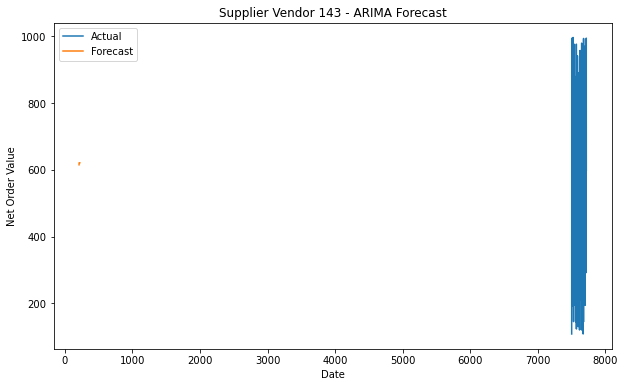

Supplier Vendor 2 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)


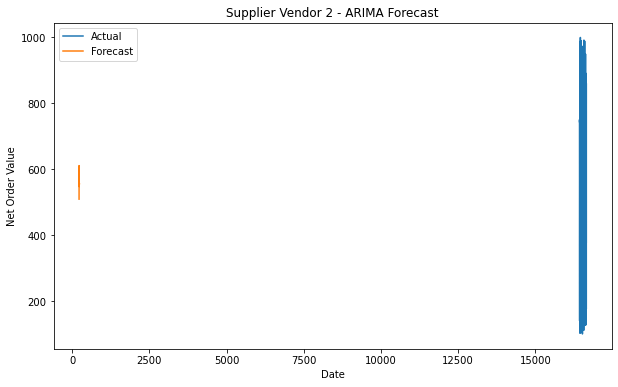

Supplier Vendor 35 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


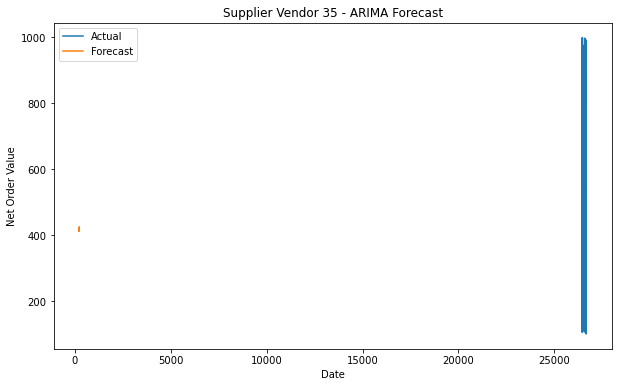

Supplier Vendor 132 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


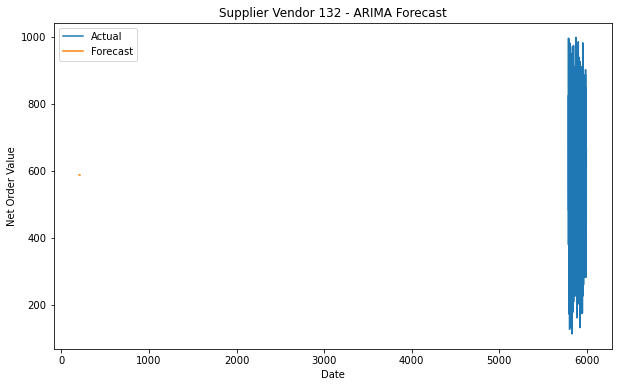

Supplier Vendor 186 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


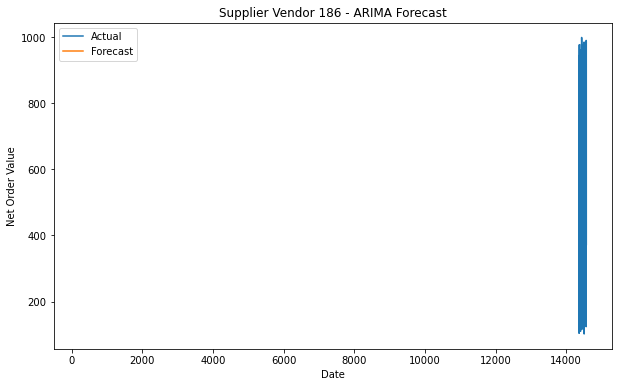

Supplier Vendor 16 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


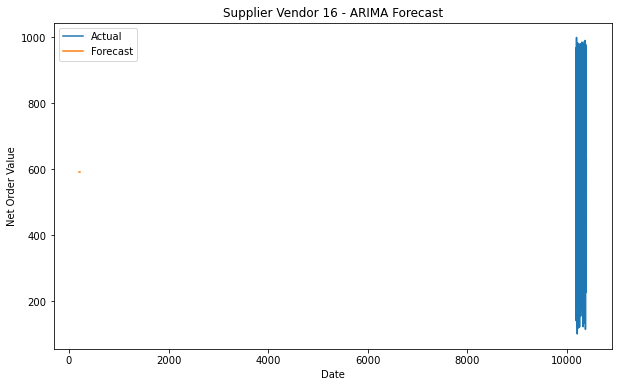

Supplier Vendor 227 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


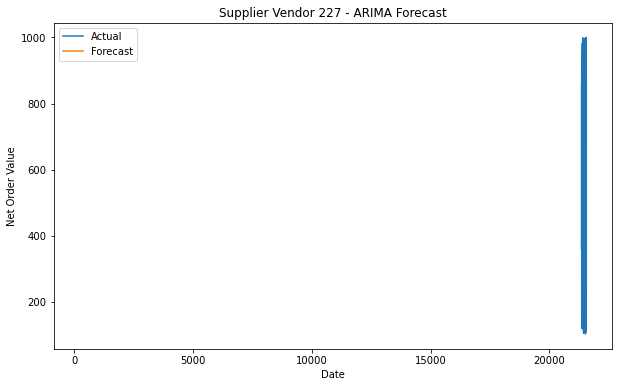

Supplier Vendor 151 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


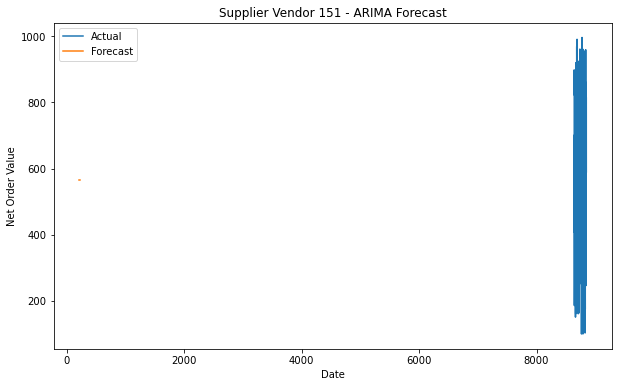

Supplier Vendor 224 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


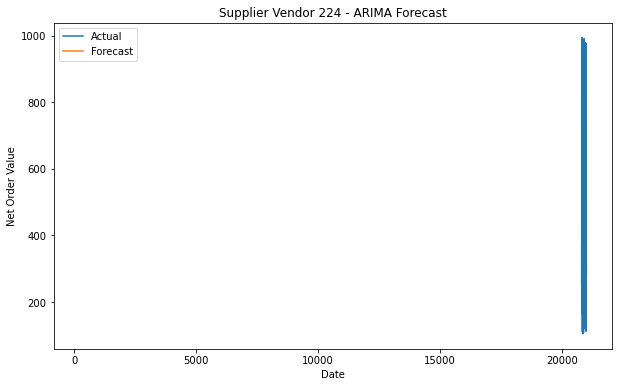

Supplier Vendor 101 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


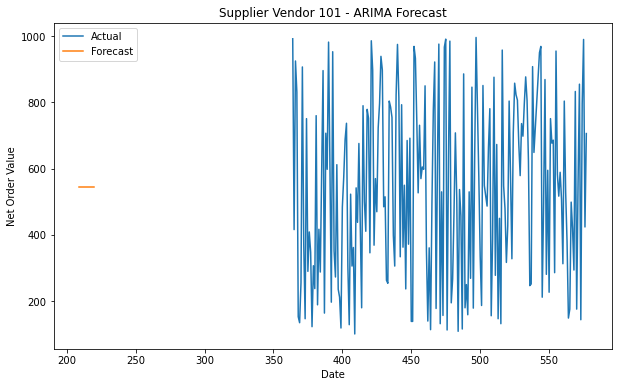

Supplier Vendor 171 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


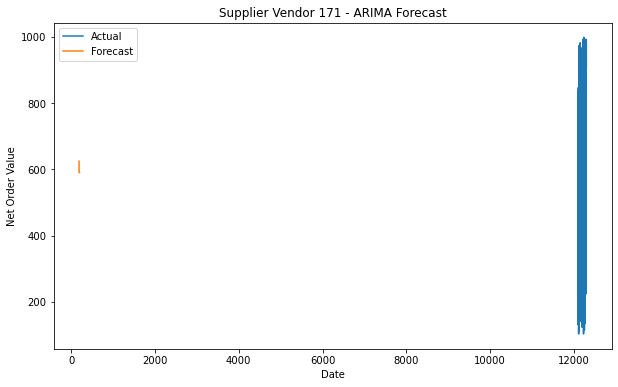

Supplier Vendor 228 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


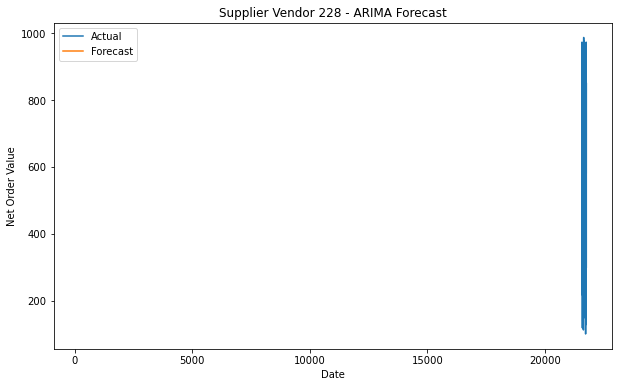

Supplier Vendor 219 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


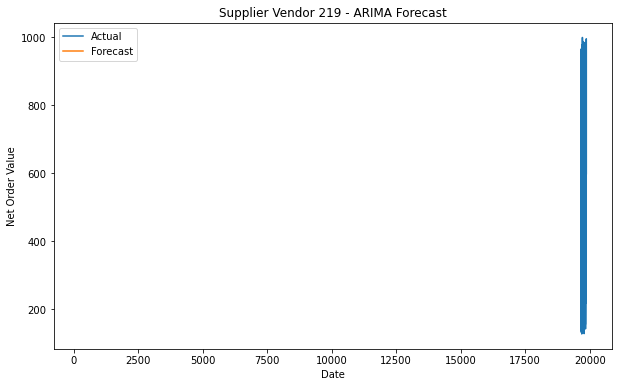

Supplier Vendor 142 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


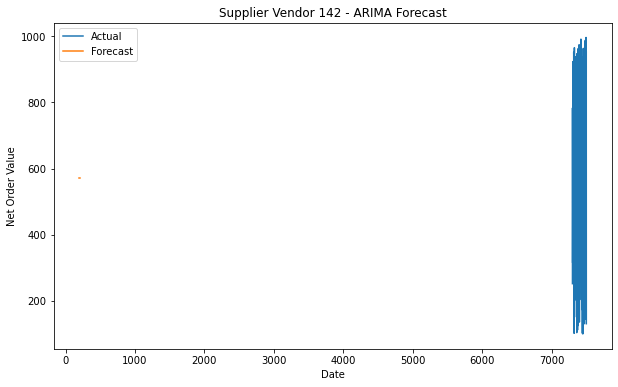

Supplier Vendor 249 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


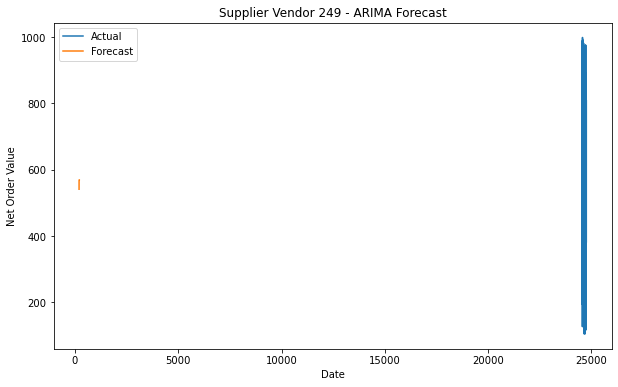

Supplier Vendor 231 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


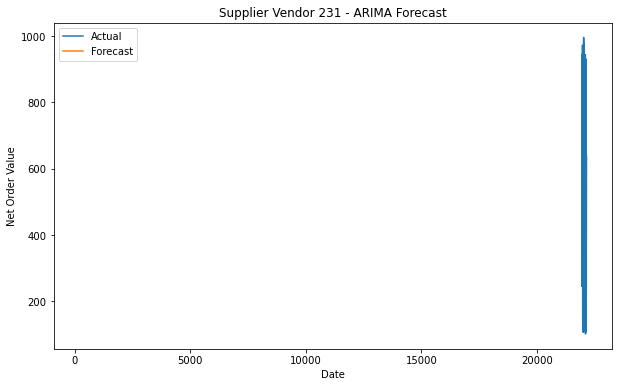

Supplier Vendor 44 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


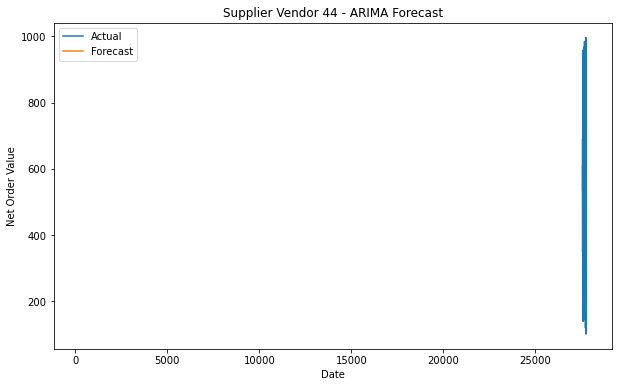

Supplier Vendor 234 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


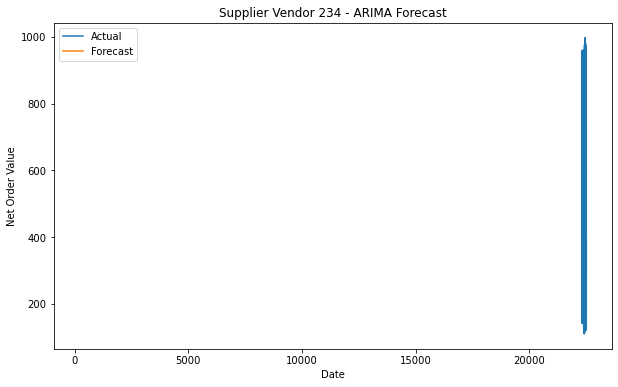

Supplier Vendor 96 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


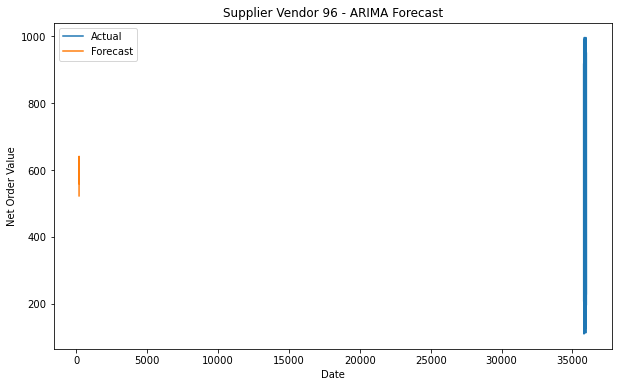

Supplier Vendor 204 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


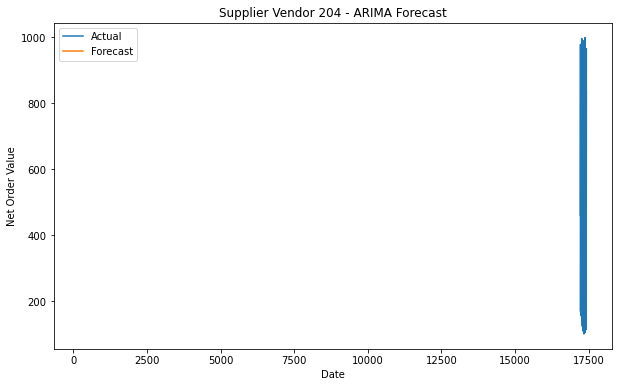

Supplier Vendor 8 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)


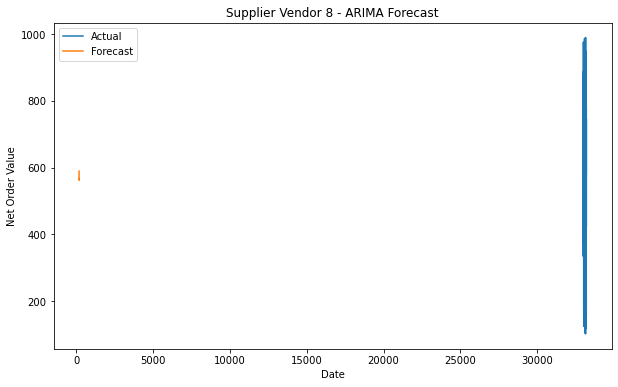

Supplier Vendor 111 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


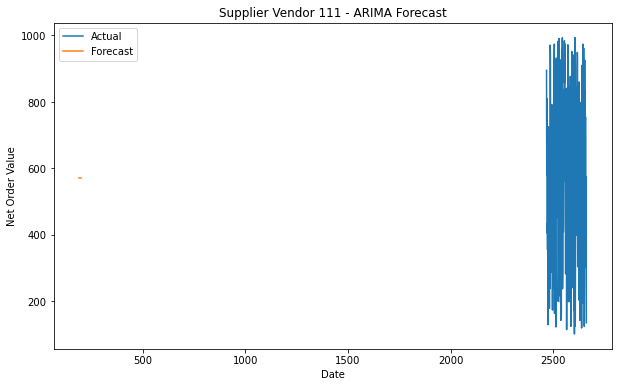

Supplier Vendor 73 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


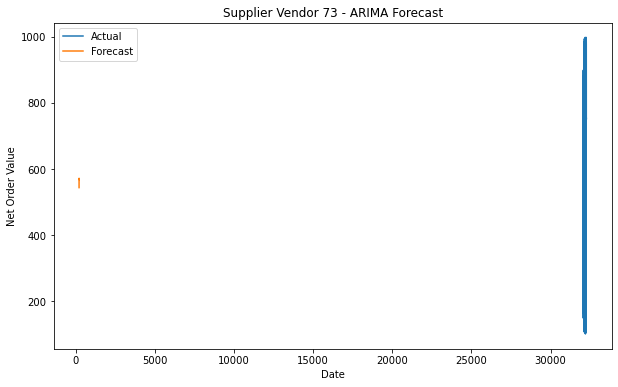

Supplier Vendor 62 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


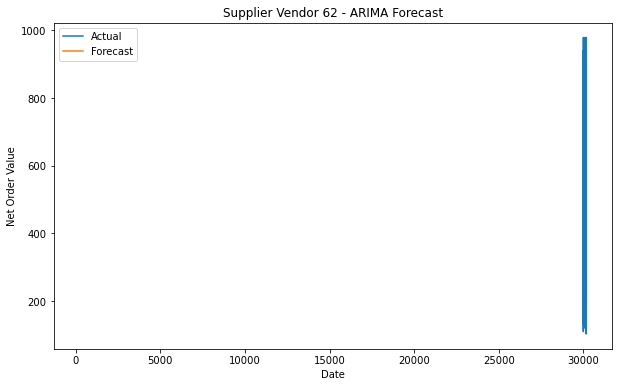

Supplier Vendor 185 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


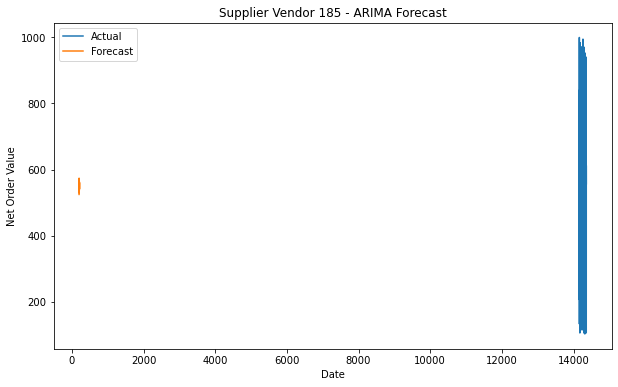

Supplier Vendor 105 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


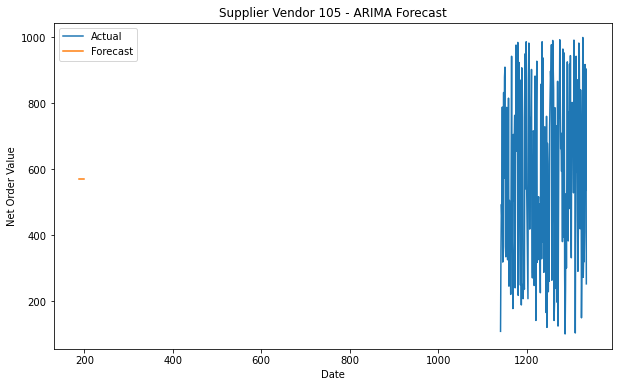

Supplier Vendor 152 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


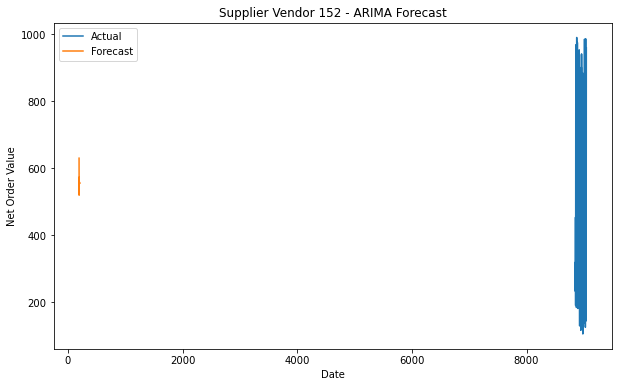

Supplier Vendor 131 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


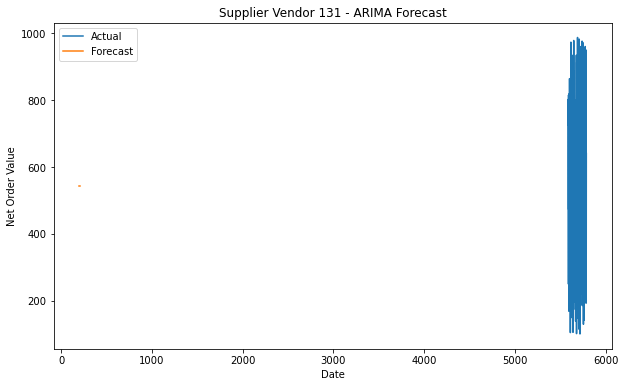

Supplier Vendor 173 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


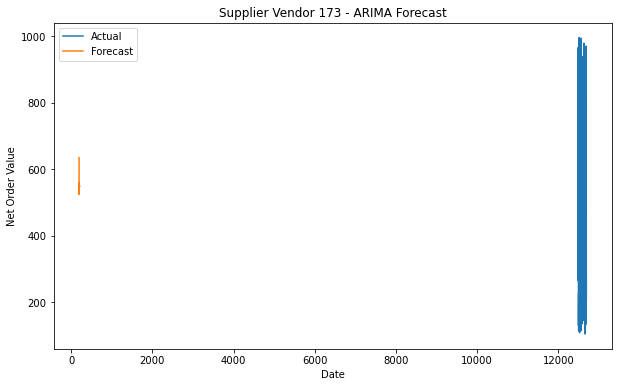

Supplier Vendor 59 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


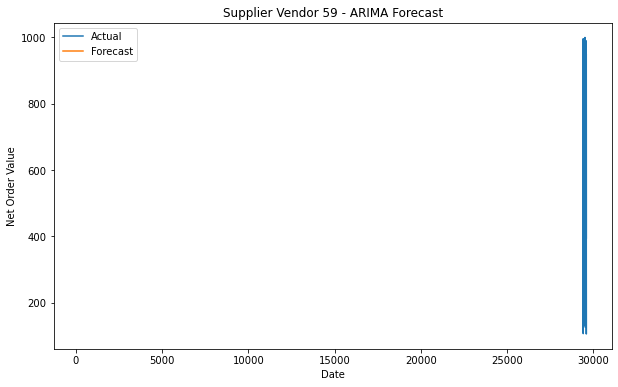

Supplier Vendor 47 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


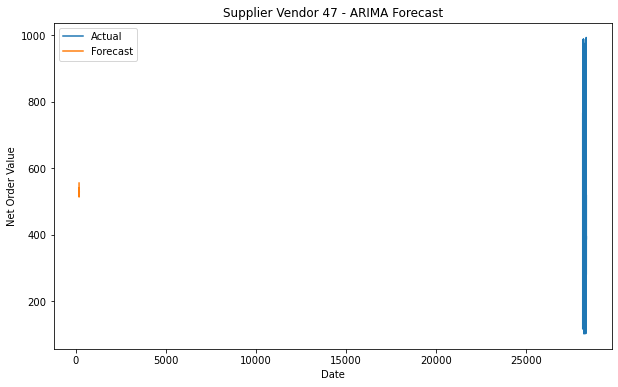

Supplier Vendor 20 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


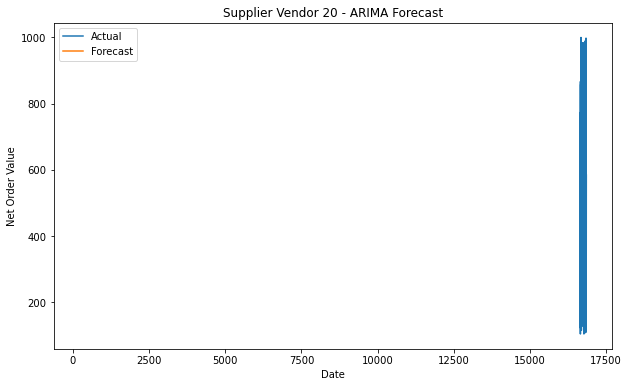

Supplier Vendor 160 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


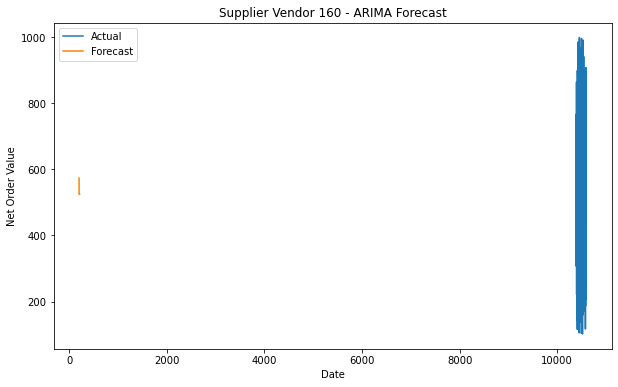

Supplier Vendor 220 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


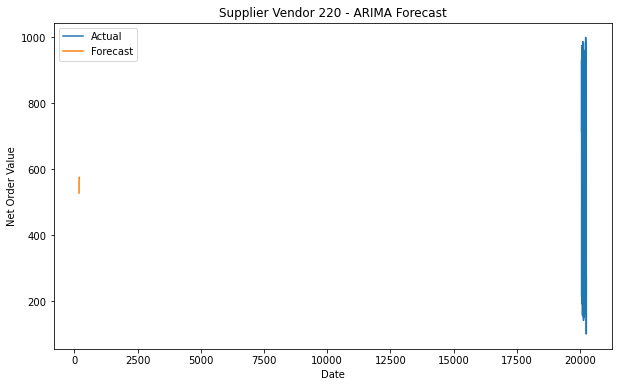

Supplier Vendor 165 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


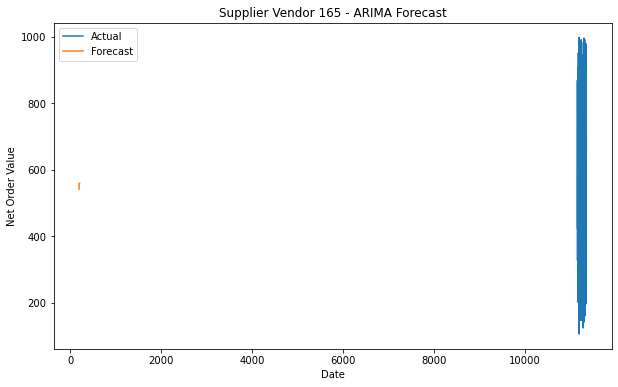

Supplier Vendor 21 data is not seasonal.
Best parameters for ARIMA model: Order (2, 0, 2)


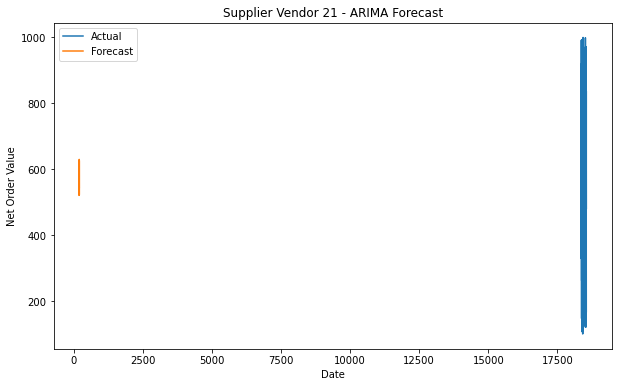

Supplier Vendor 112 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


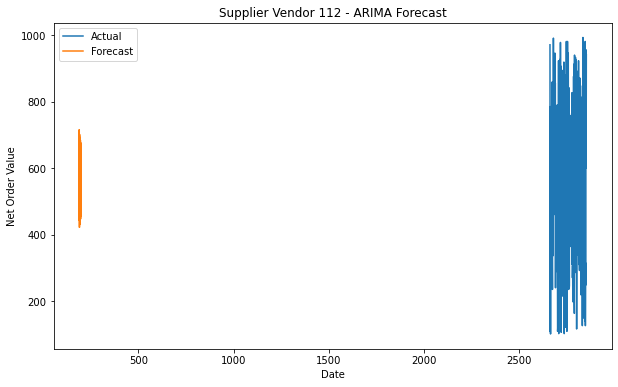

Supplier Vendor 198 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


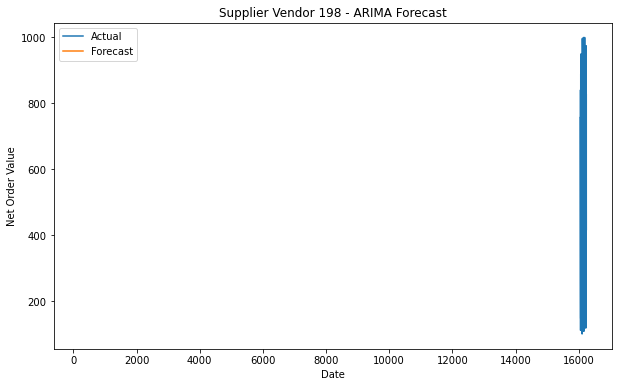

Supplier Vendor 74 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


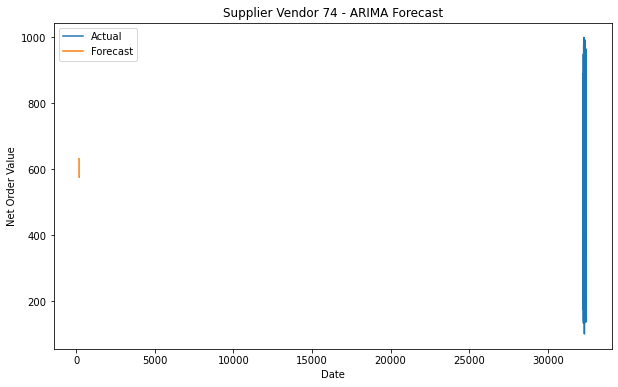

Supplier Vendor 25 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


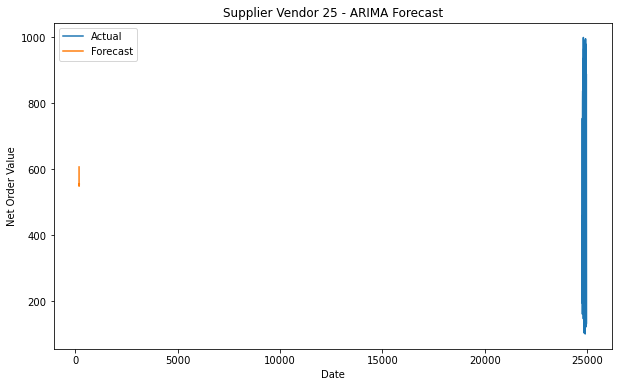

Supplier Vendor 95 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


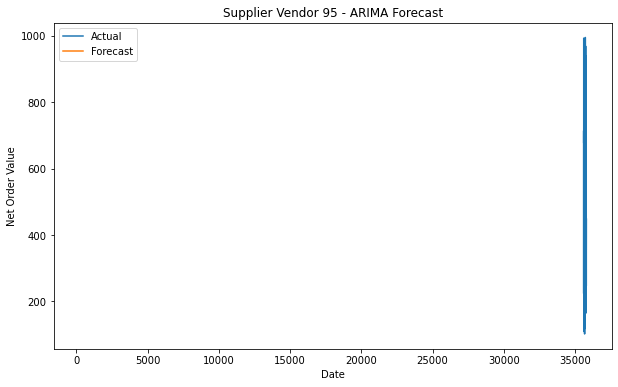

Supplier Vendor 15 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


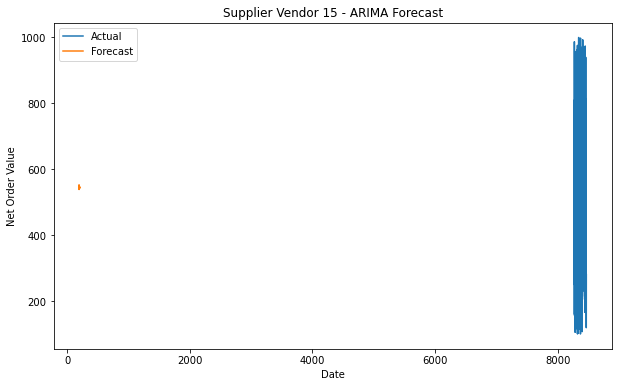

Supplier Vendor 98 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


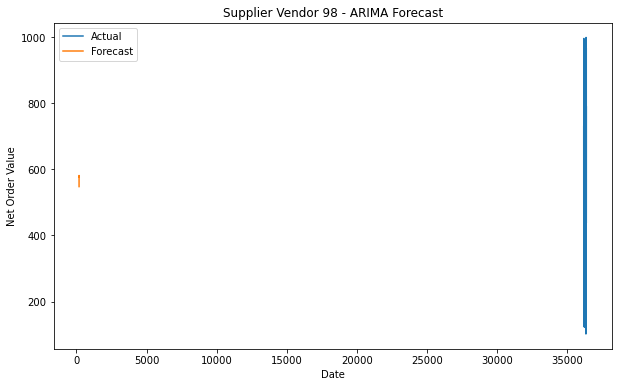

Supplier Vendor 67 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


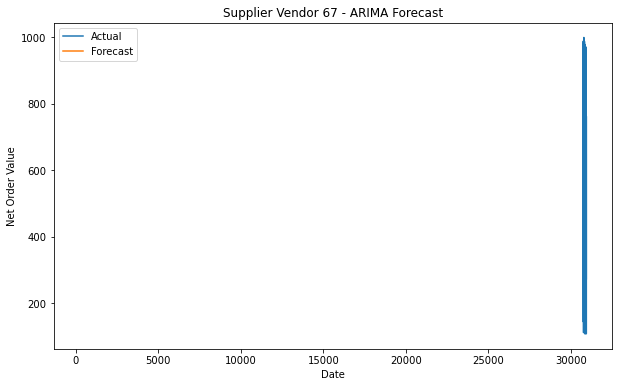

Supplier Vendor 207 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


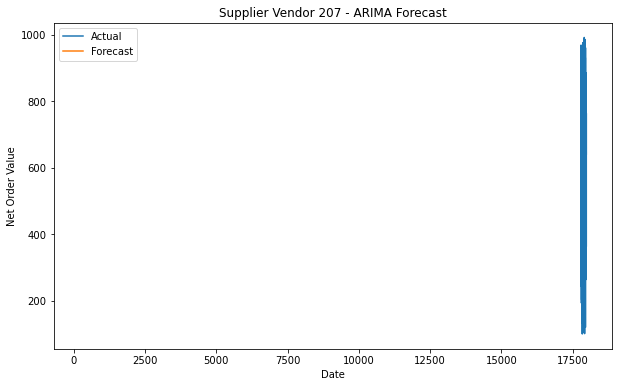

Supplier Vendor 104 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


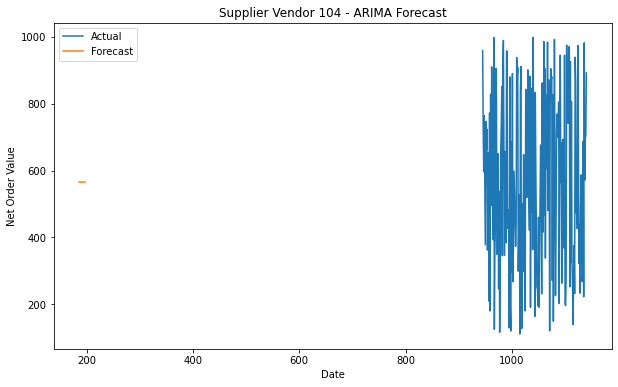

Supplier Vendor 235 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


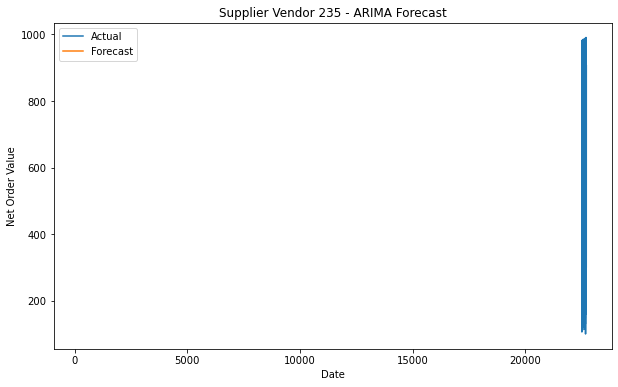

Supplier Vendor 9 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


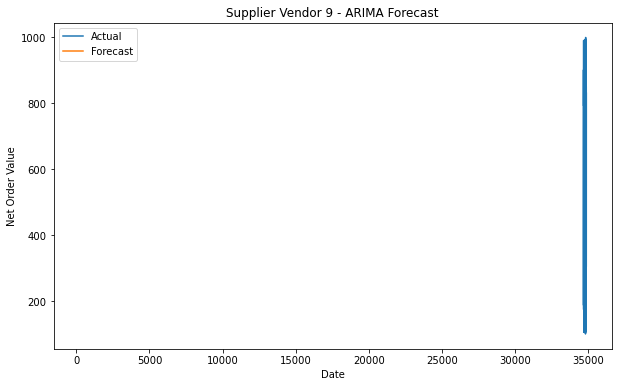

Supplier Vendor 245 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


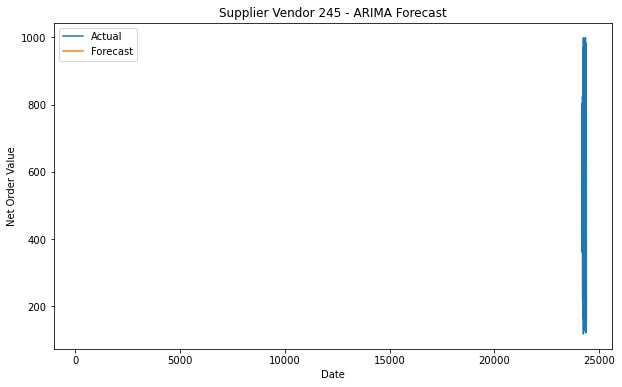

Supplier Vendor 199 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


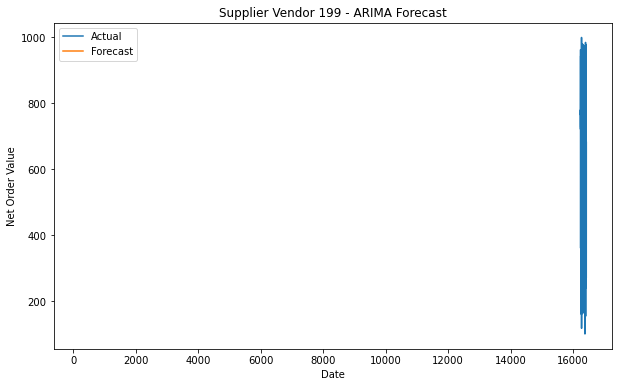

Supplier Vendor 217 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


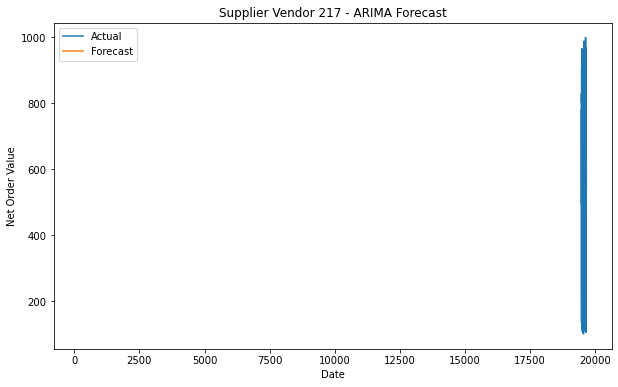

Supplier Vendor 108 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


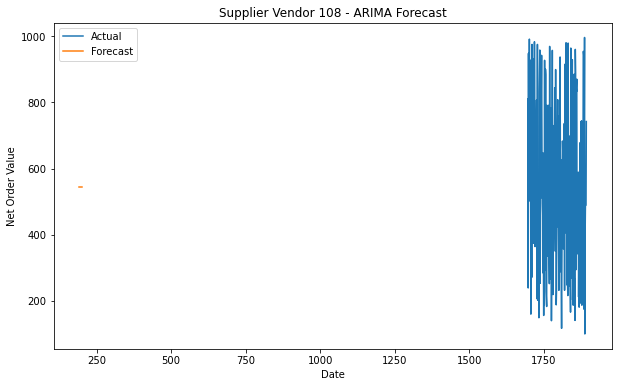

Supplier Vendor 157 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


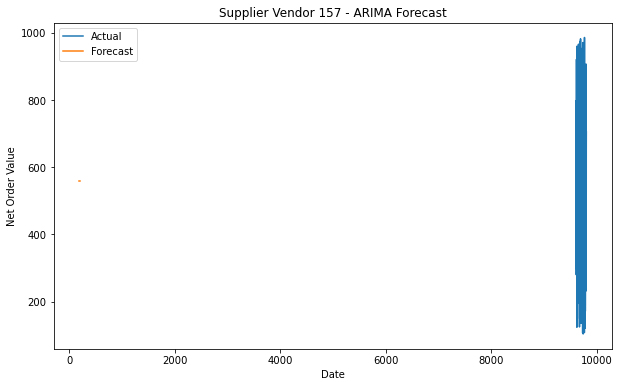

Supplier Vendor 123 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


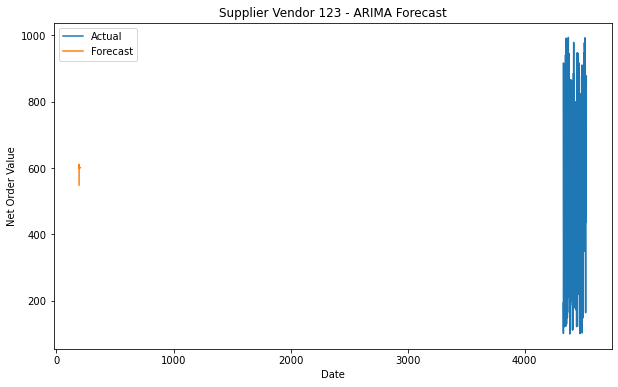

Supplier Vendor 215 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


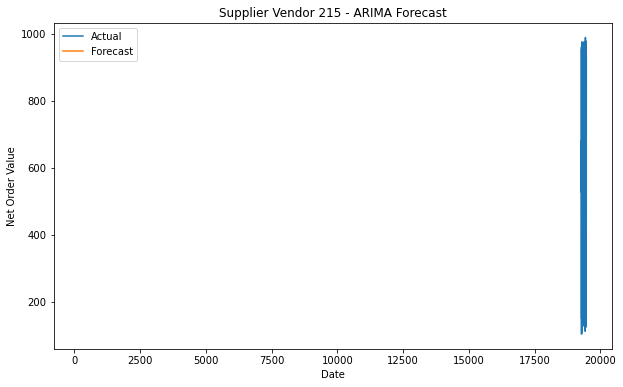

Supplier Vendor 164 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


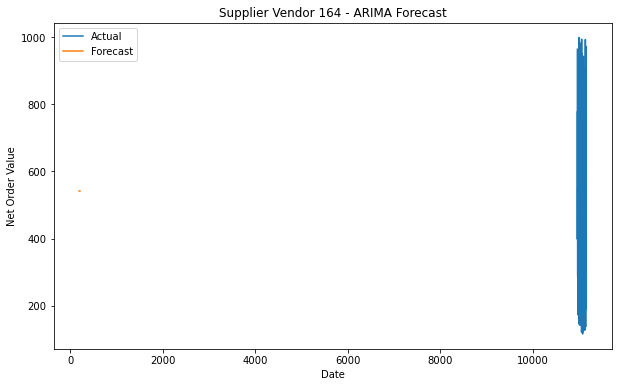

Supplier Vendor 181 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


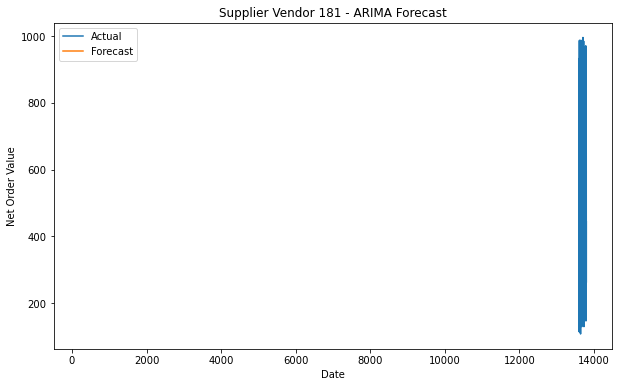

Supplier Vendor 69 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


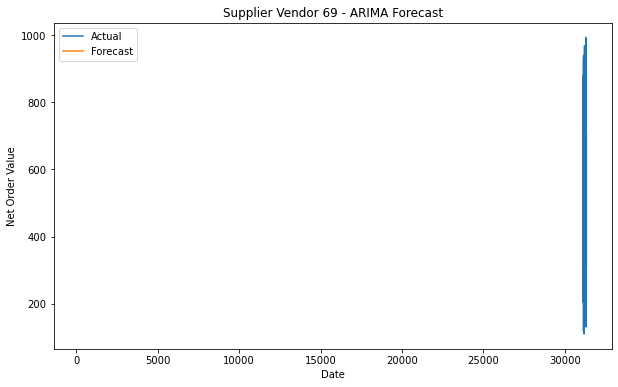

Supplier Vendor 72 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


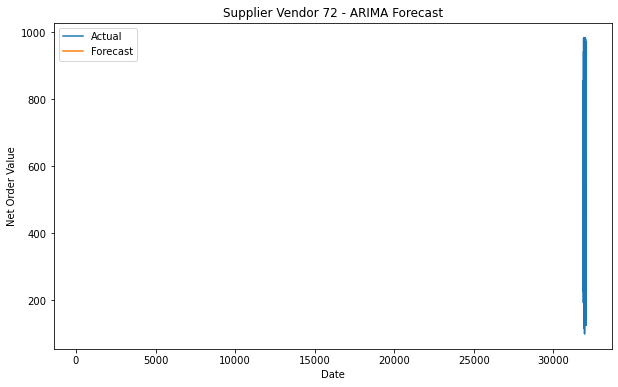

Supplier Vendor 221 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


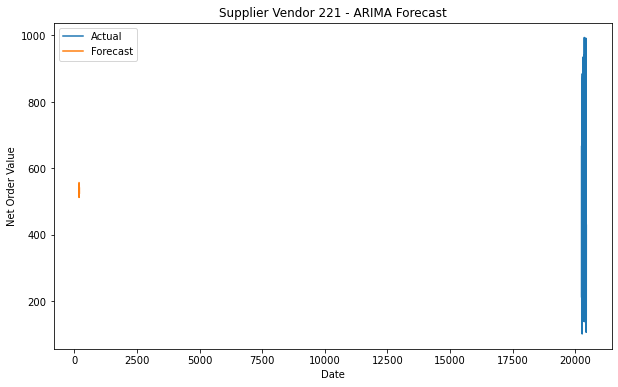

Supplier Vendor 170 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


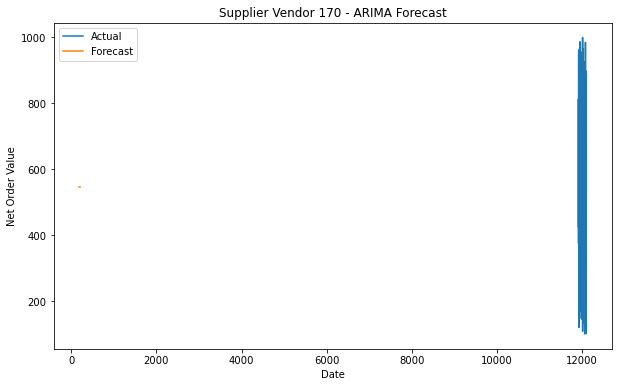

Supplier Vendor 118 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


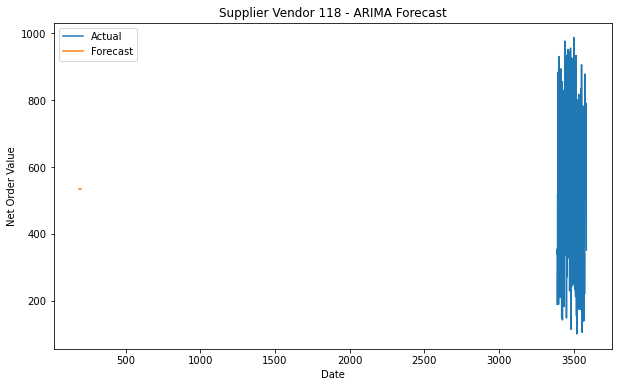

Supplier Vendor 141 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


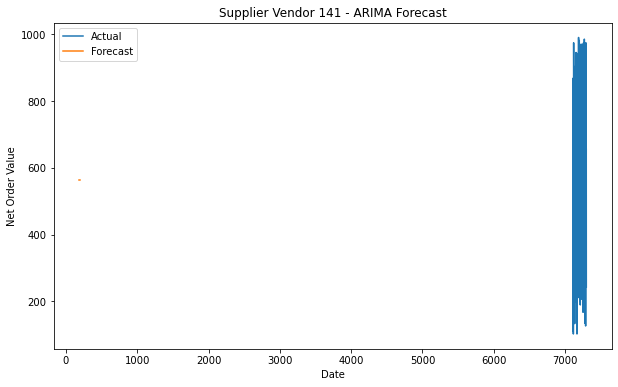

Supplier Vendor 189 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


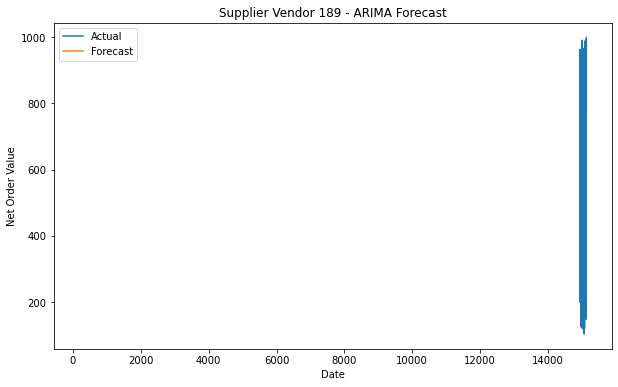

Supplier Vendor 7 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


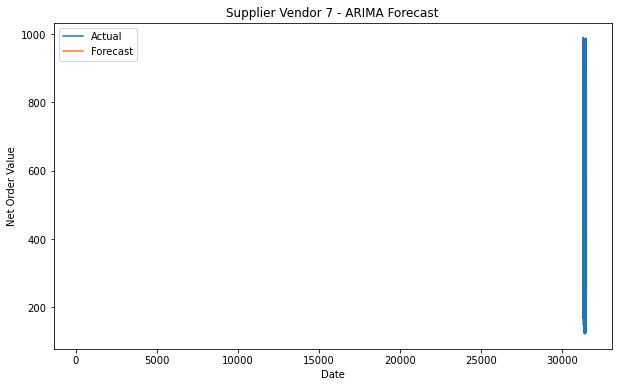

Supplier Vendor 136 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


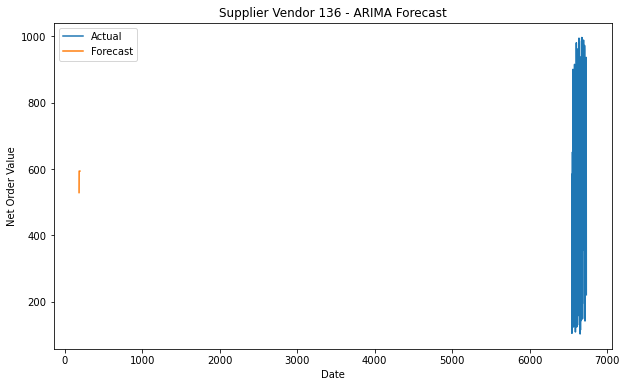

Supplier Vendor 57 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


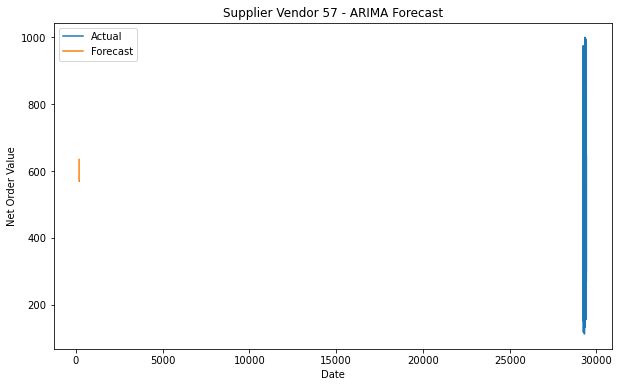

Supplier Vendor 110 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


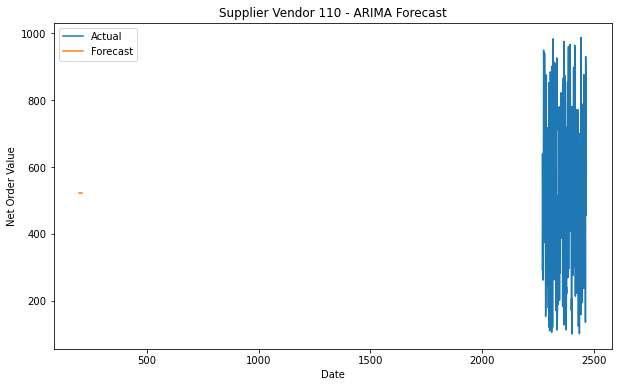

Supplier Vendor 225 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


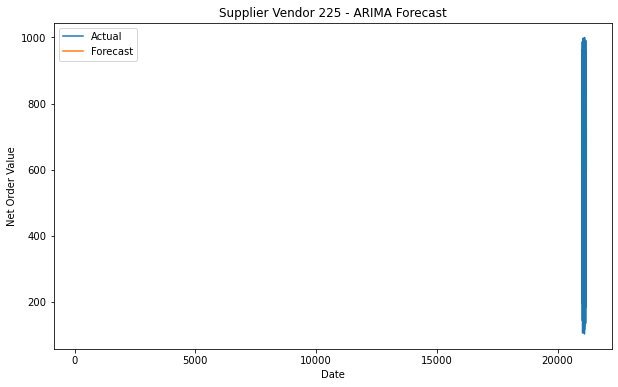

Supplier Vendor 94 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


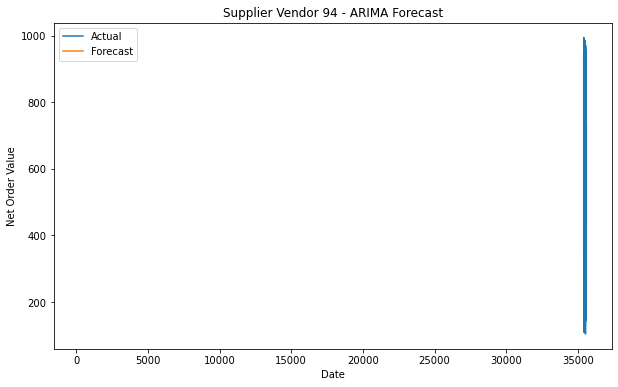

Supplier Vendor 209 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


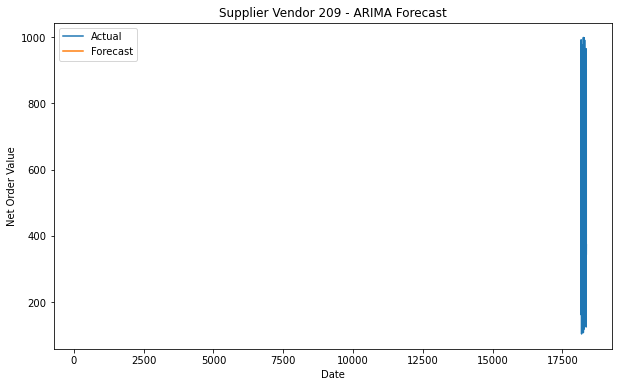

Supplier Vendor 162 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


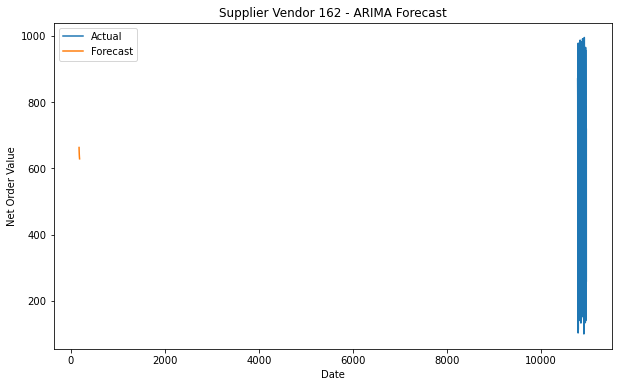

Supplier Vendor 65 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


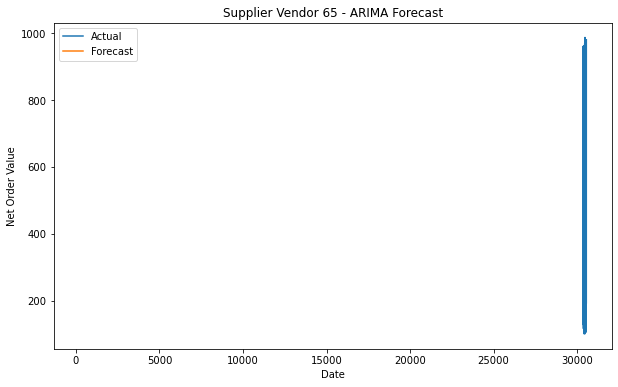

Supplier Vendor 137 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


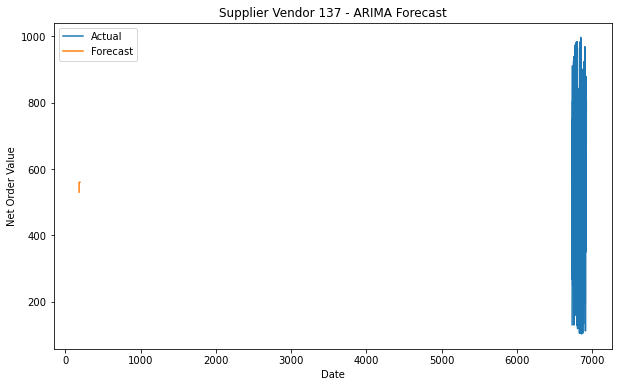

Supplier Vendor 77 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


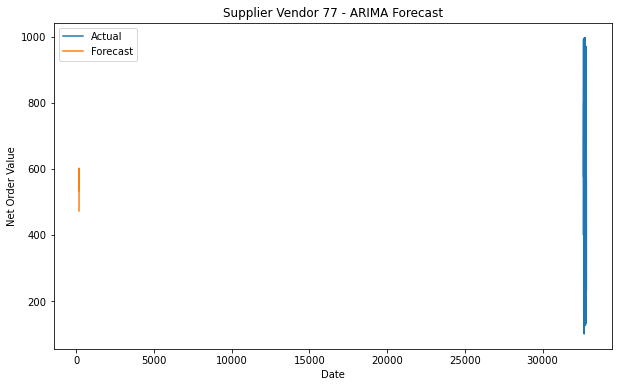

Supplier Vendor 83 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


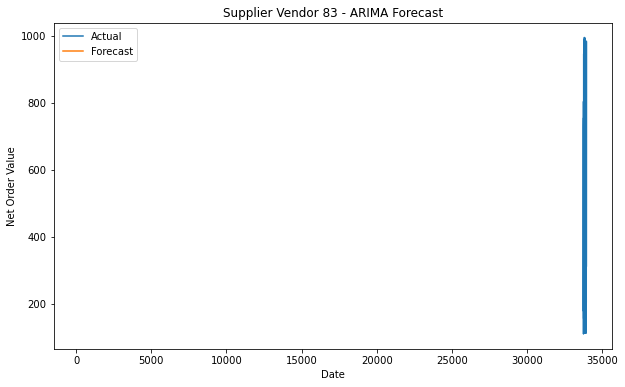

Supplier Vendor 22 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


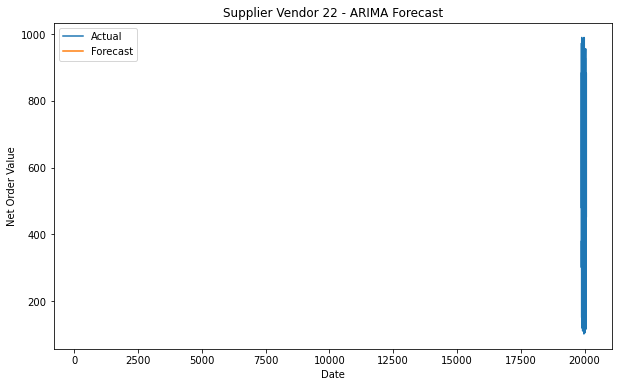

Supplier Vendor 13 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


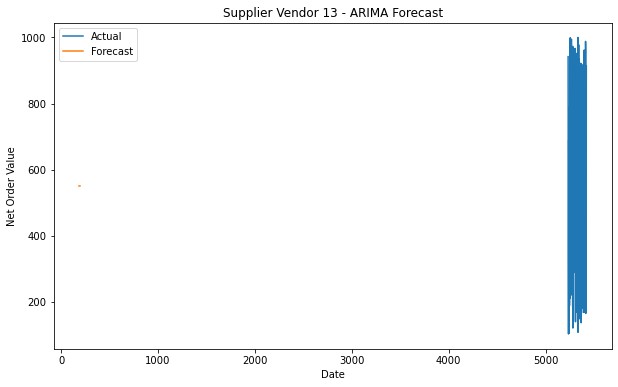

Supplier Vendor 159 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


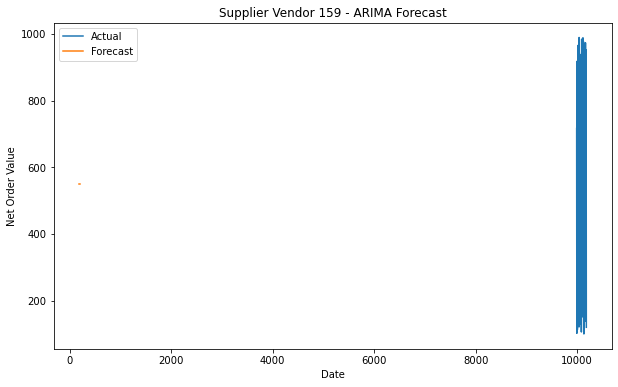

Supplier Vendor 155 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


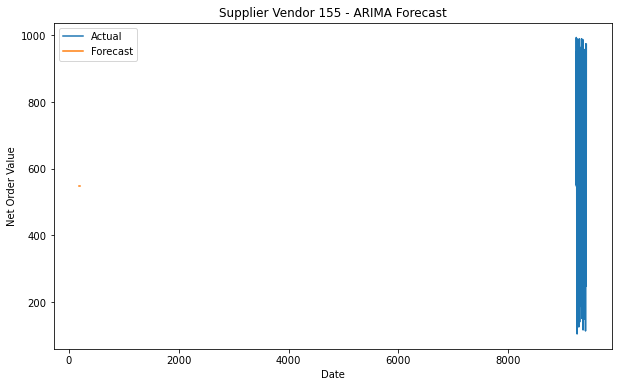

Supplier Vendor 188 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


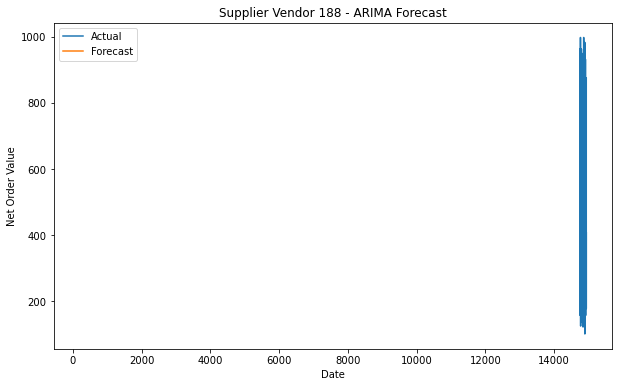

Supplier Vendor 3 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


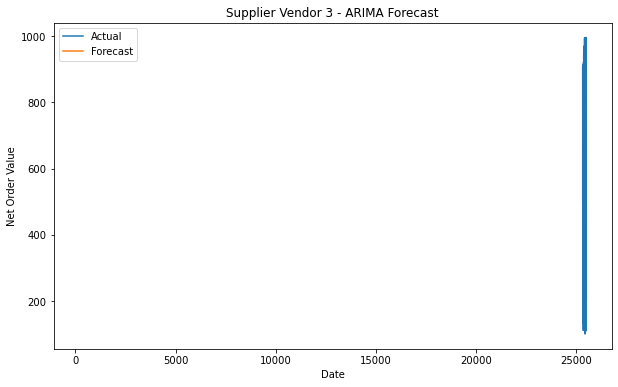

Supplier Vendor 195 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


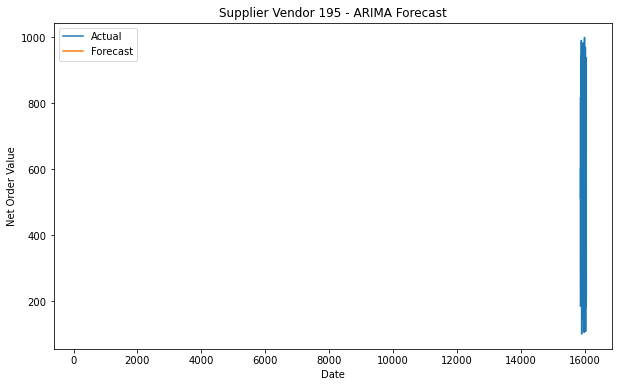

Supplier Vendor 145 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


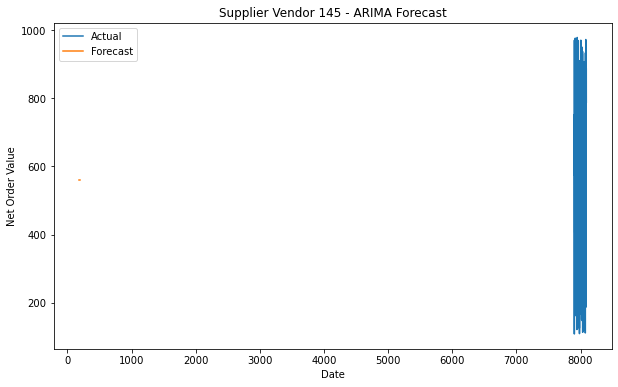

Supplier Vendor 243 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)


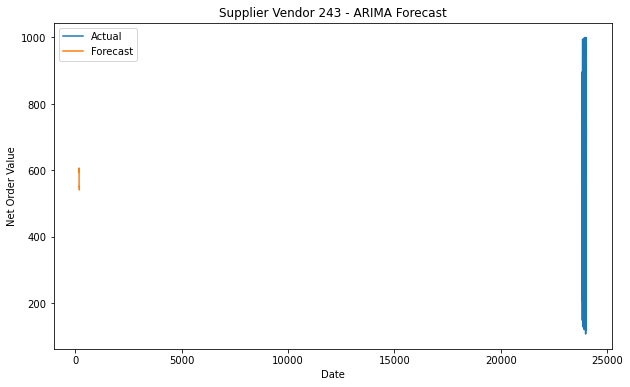

Supplier Vendor 33 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


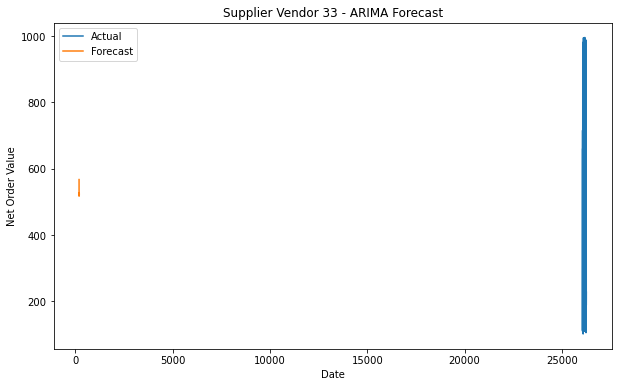

Supplier Vendor 153 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


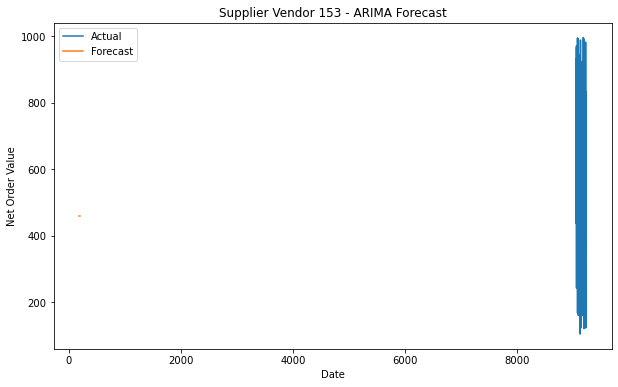

Supplier Vendor 246 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


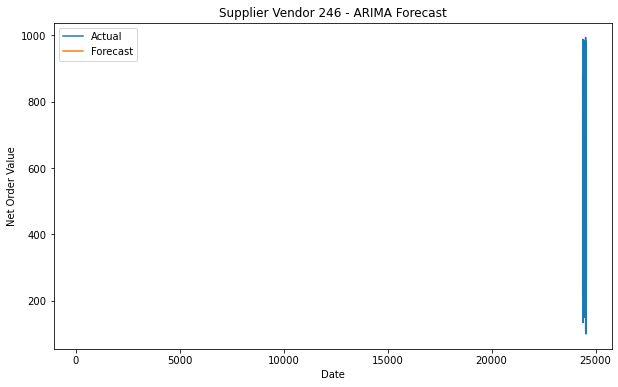

Supplier Vendor 5 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


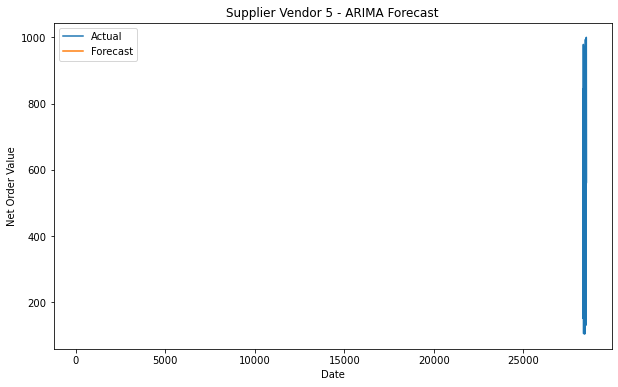

Supplier Vendor 113 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


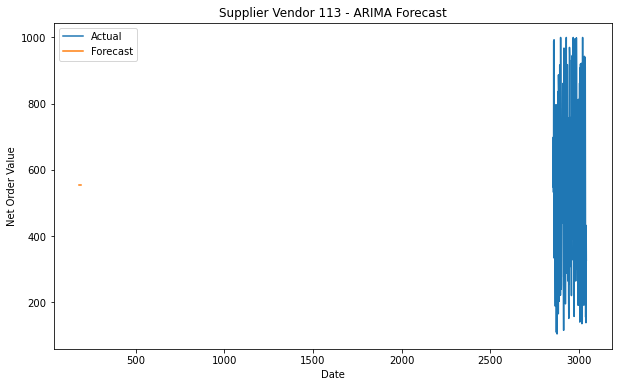

Supplier Vendor 240 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


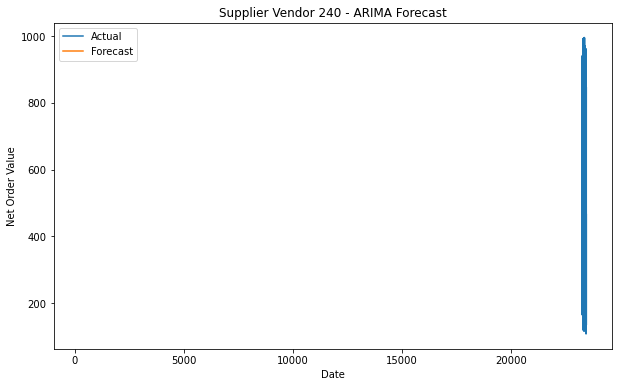

Supplier Vendor 172 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


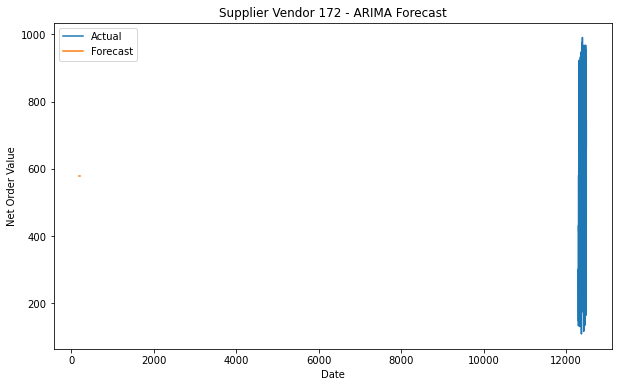

Supplier Vendor 68 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


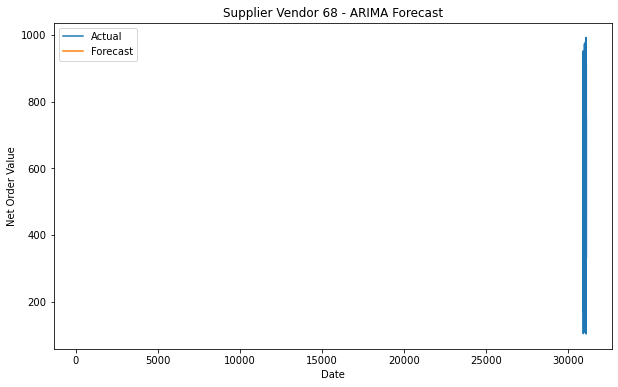

Supplier Vendor 194 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


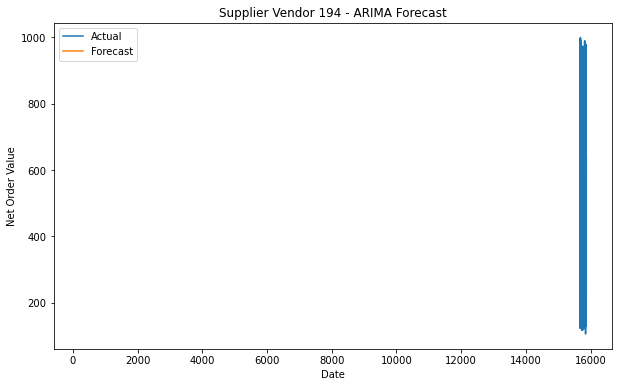

Supplier Vendor 31 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


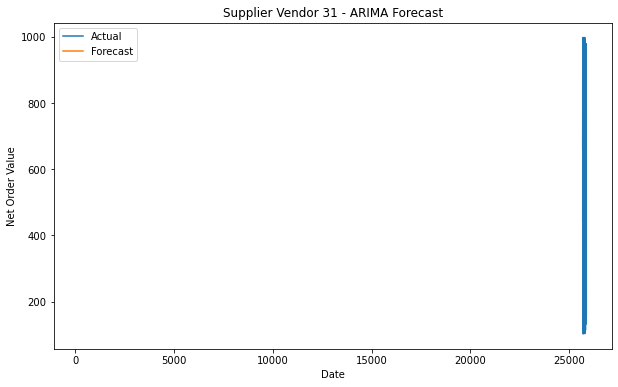

Supplier Vendor 202 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


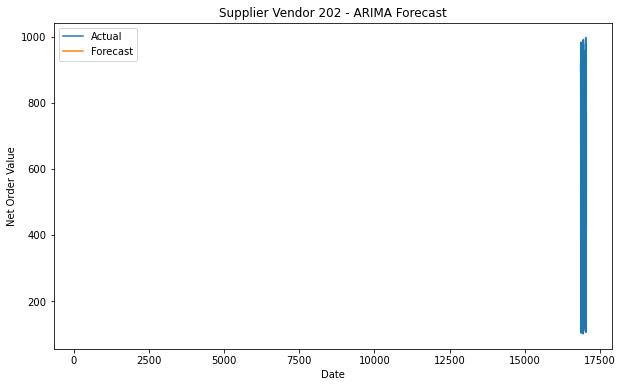

Supplier Vendor 18 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


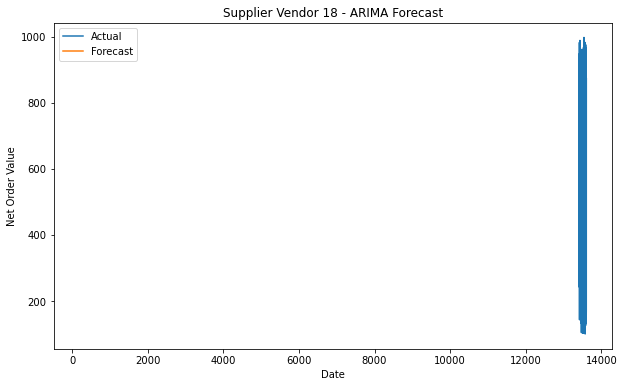

Supplier Vendor 121 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


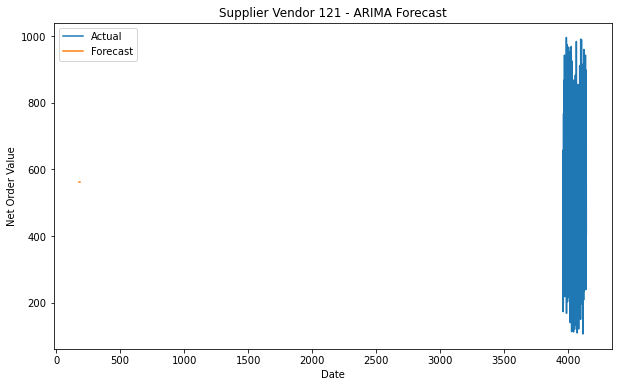

Supplier Vendor 71 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


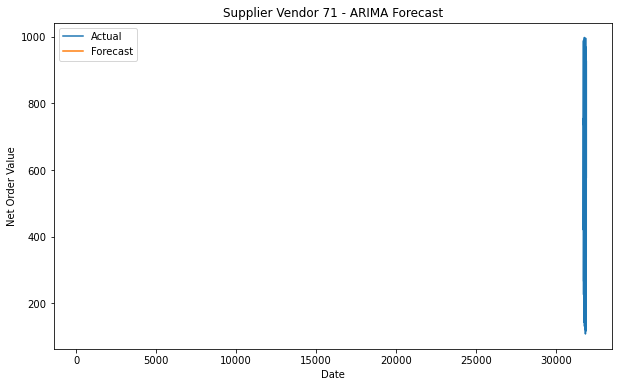

Supplier Vendor 158 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


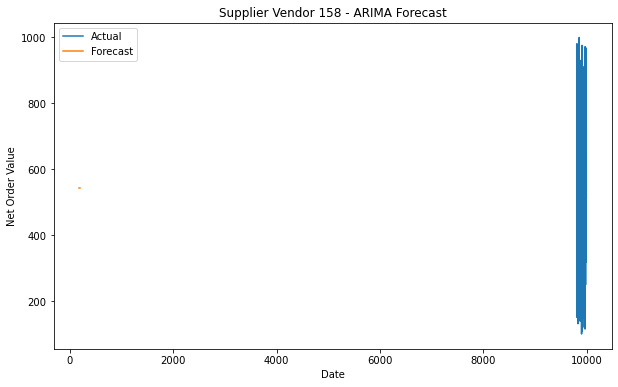

Supplier Vendor 11 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


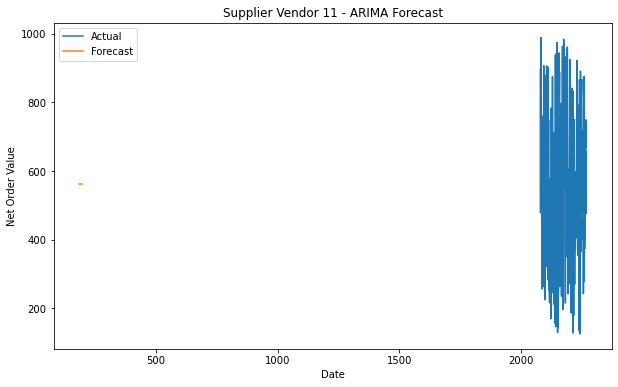

Supplier Vendor 6 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


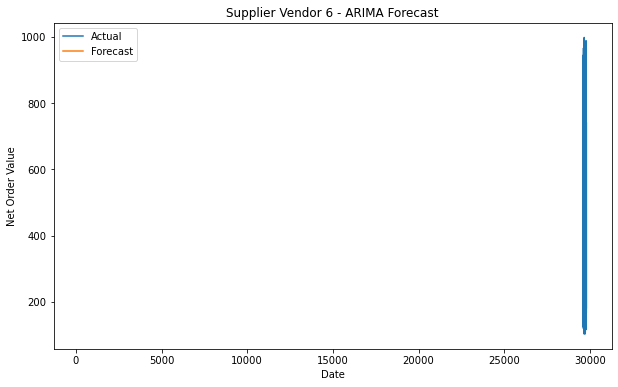

Supplier Vendor 80 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


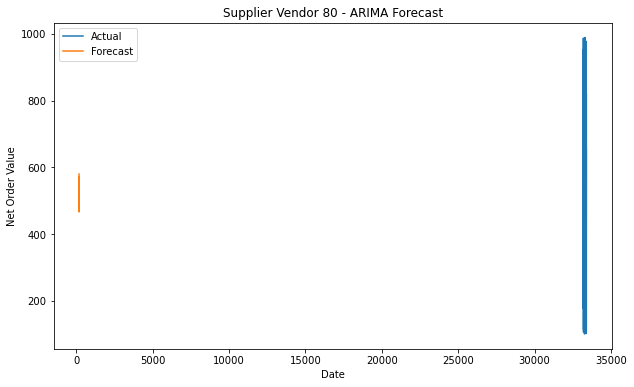

Supplier Vendor 93 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


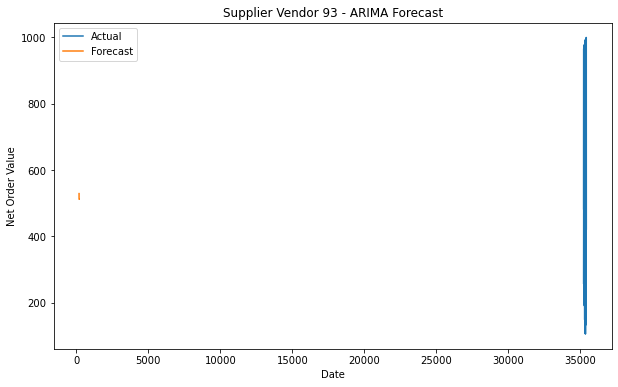

Supplier Vendor 226 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


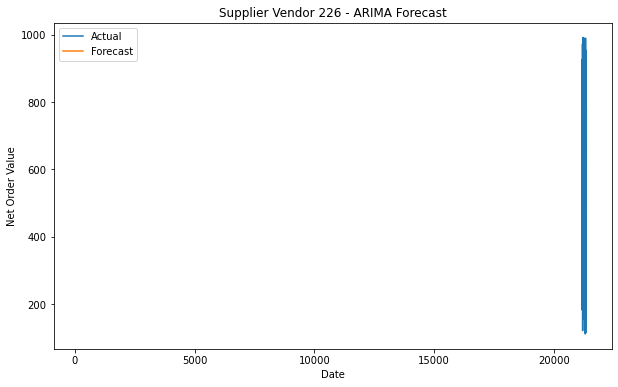

Supplier Vendor 178 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


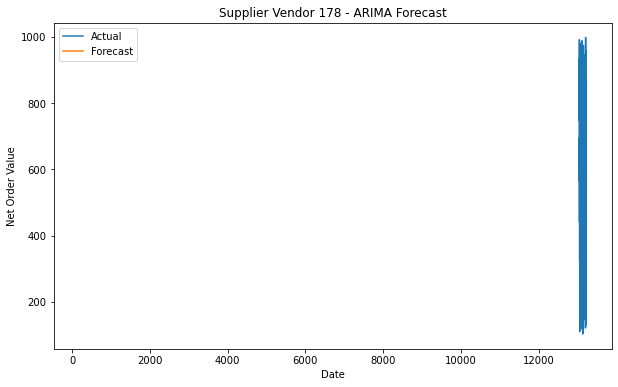

Supplier Vendor 140 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


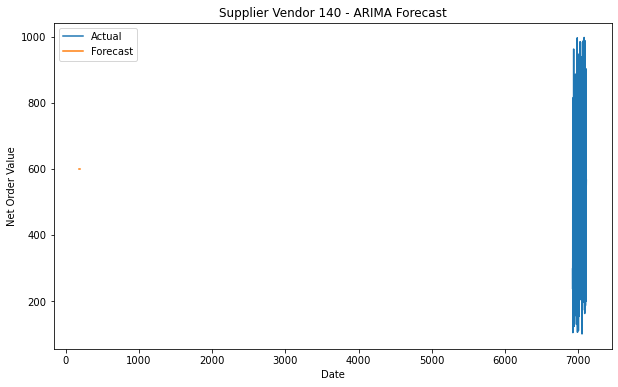

Supplier Vendor 66 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


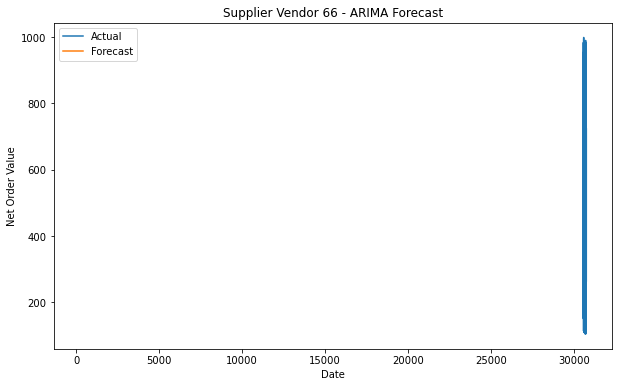

Supplier Vendor 92 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


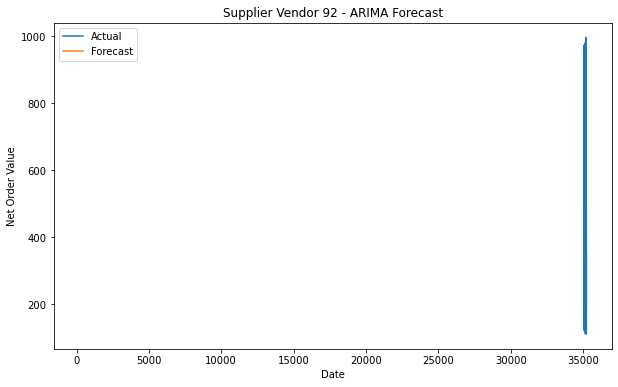

Supplier Vendor 119 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


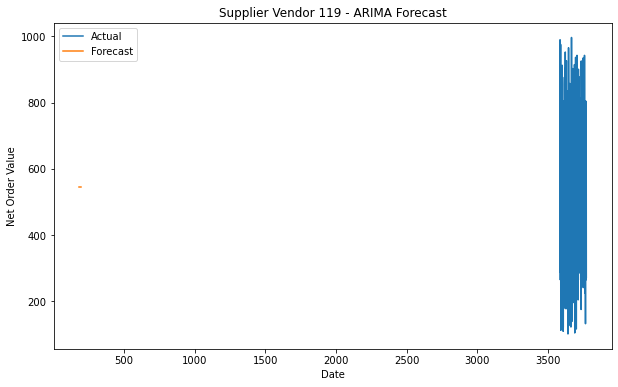

Supplier Vendor 81 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


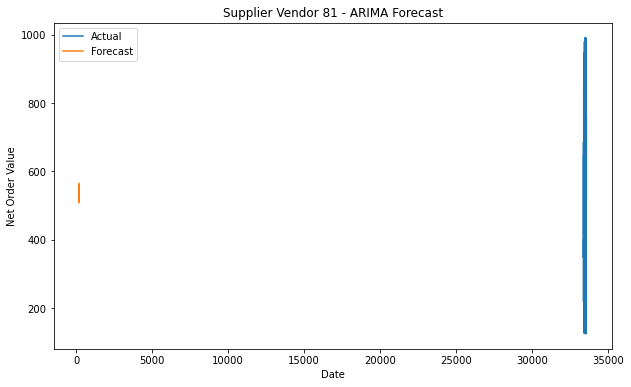

Supplier Vendor 30 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


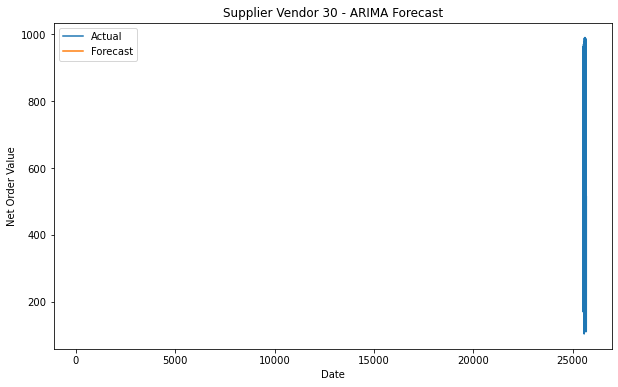

Supplier Vendor 109 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


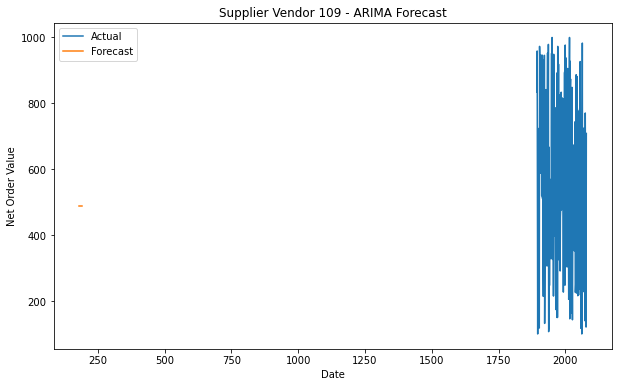

Supplier Vendor 41 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


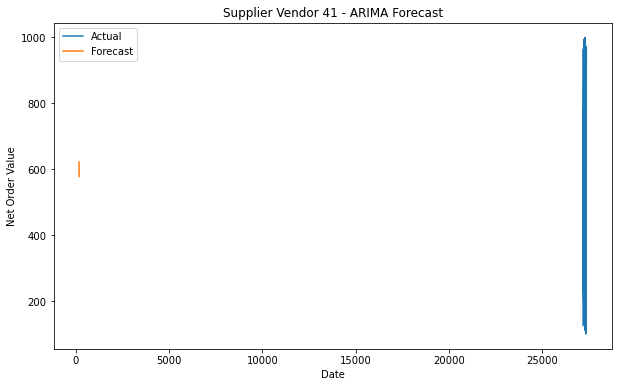

Supplier Vendor 208 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


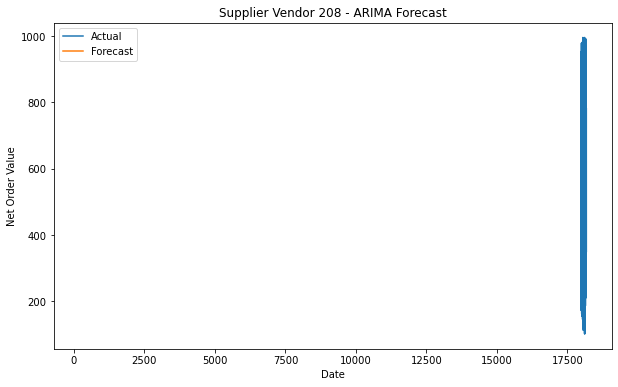

Supplier Vendor 124 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


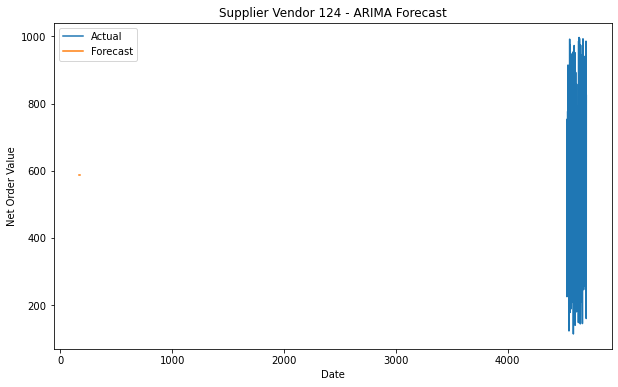

Supplier Vendor 210 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


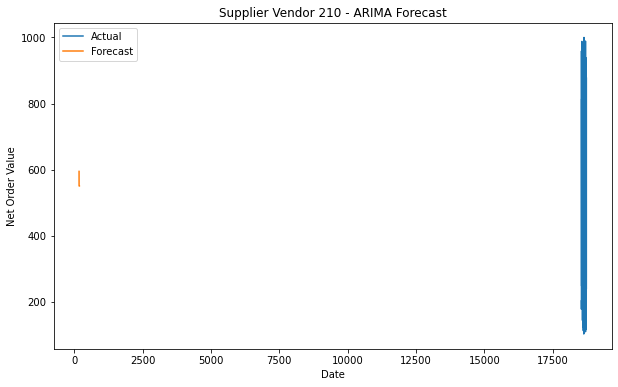

Supplier Vendor 169 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


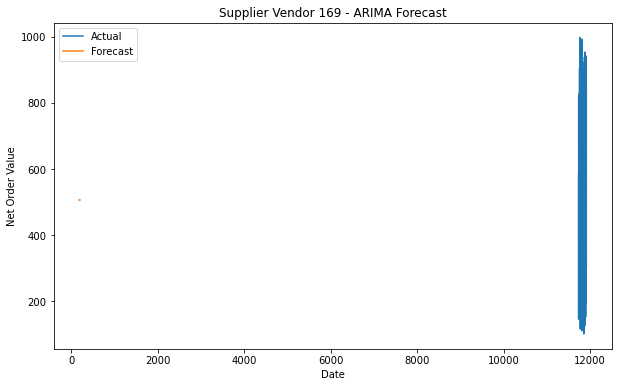

Supplier Vendor 214 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


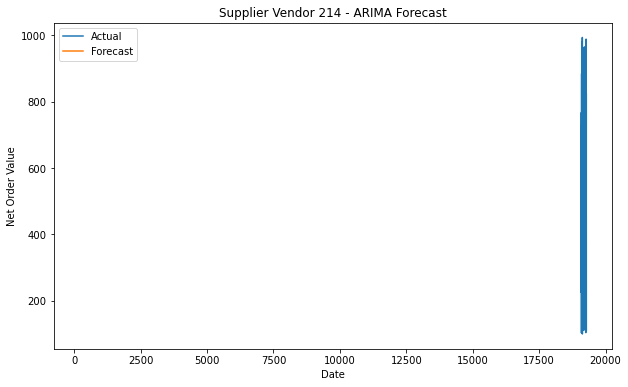

Supplier Vendor 179 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


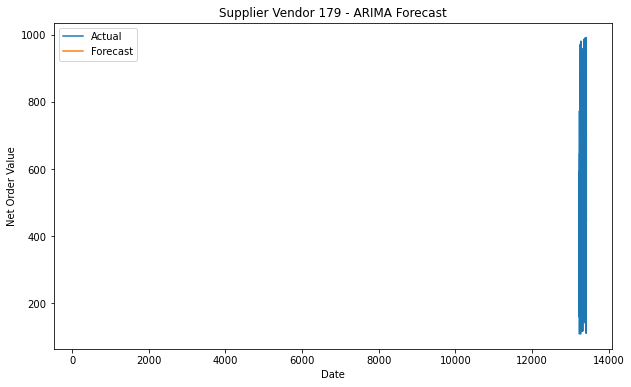

Supplier Vendor 133 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


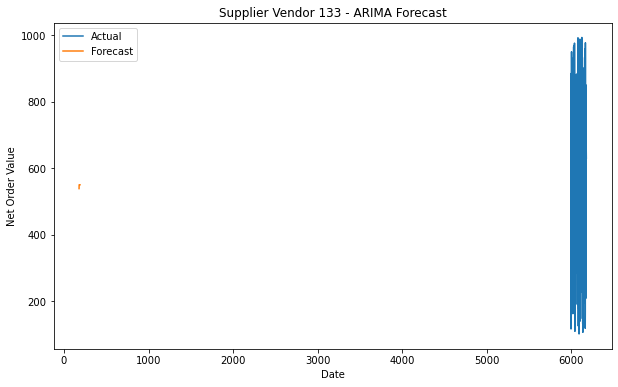

Supplier Vendor 40 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


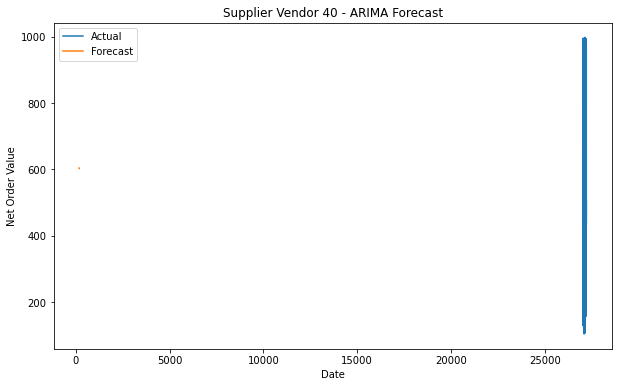

Supplier Vendor 122 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


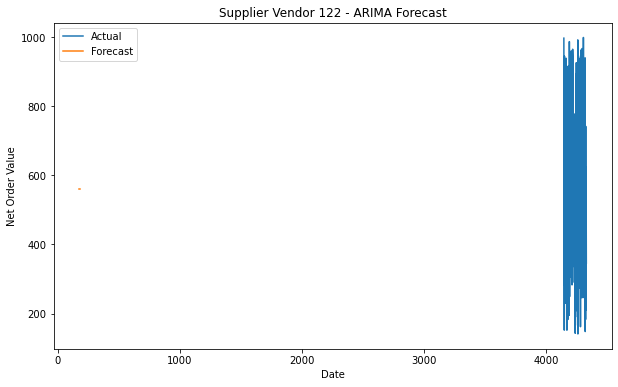

Supplier Vendor 205 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)


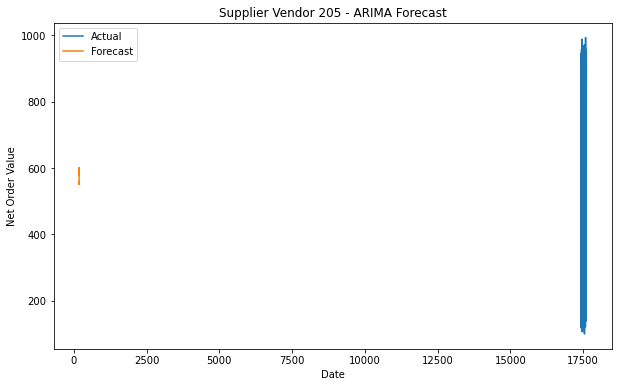

Supplier Vendor 206 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


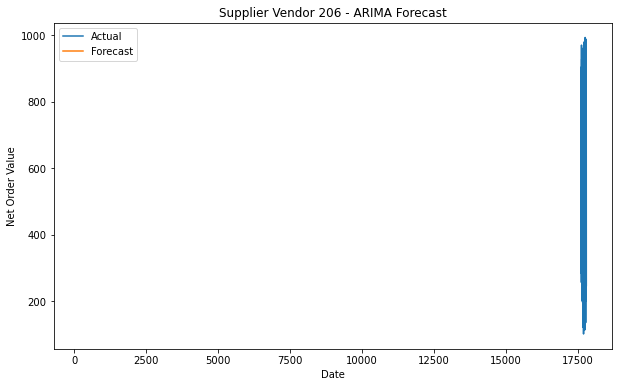

Supplier Vendor 106 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


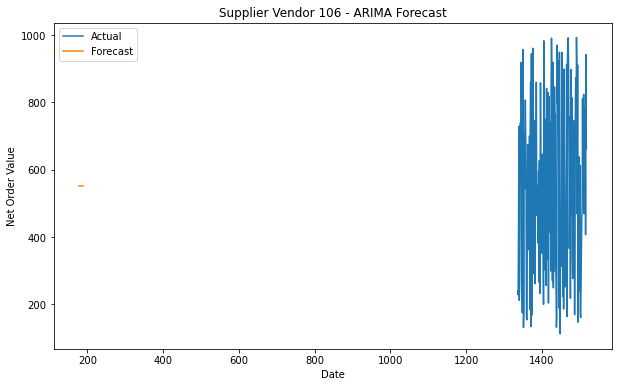

Supplier Vendor 90 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


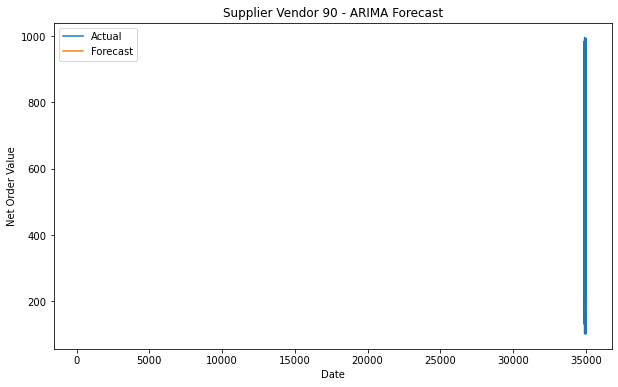

Supplier Vendor 191 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


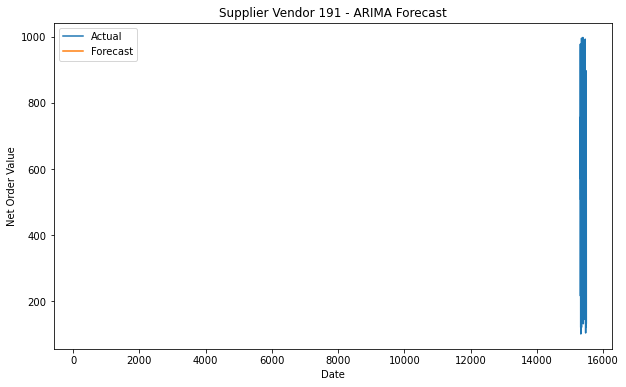

Supplier Vendor 212 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


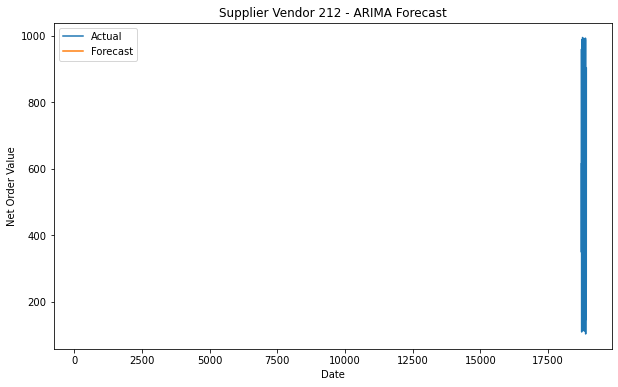

Supplier Vendor 51 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


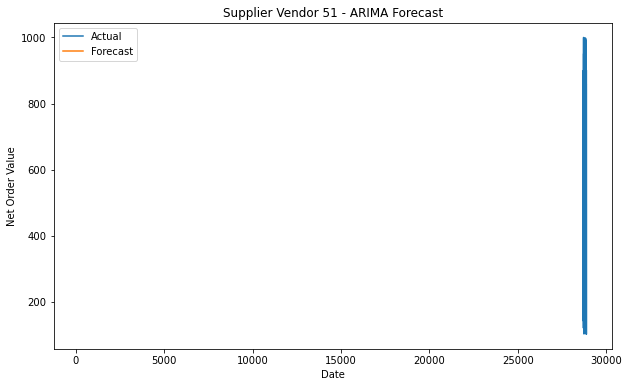

Supplier Vendor 54 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


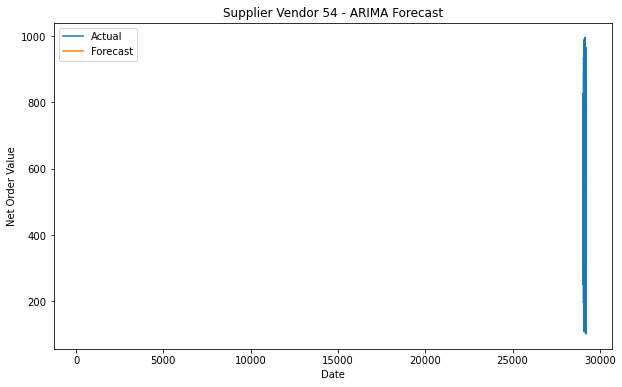

Supplier Vendor 229 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


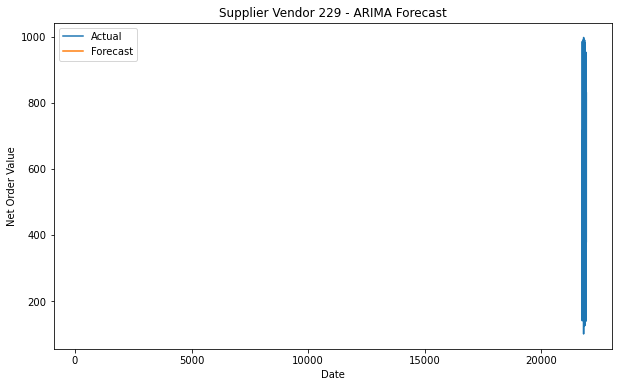

Supplier Vendor 34 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


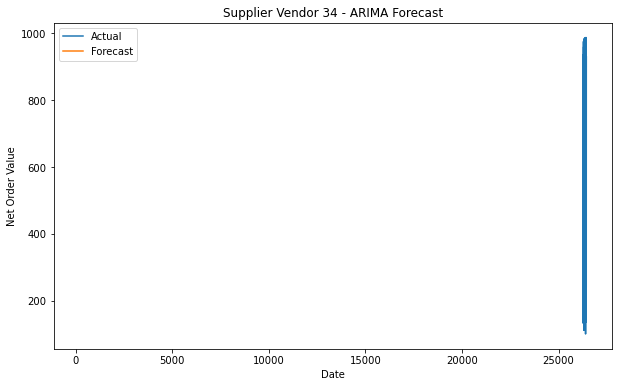

Supplier Vendor 213 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


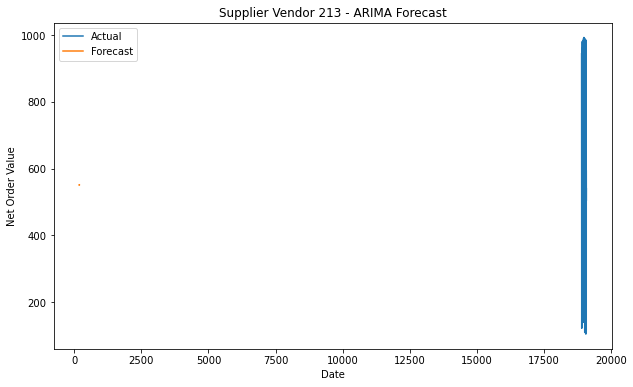

Supplier Vendor 26 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


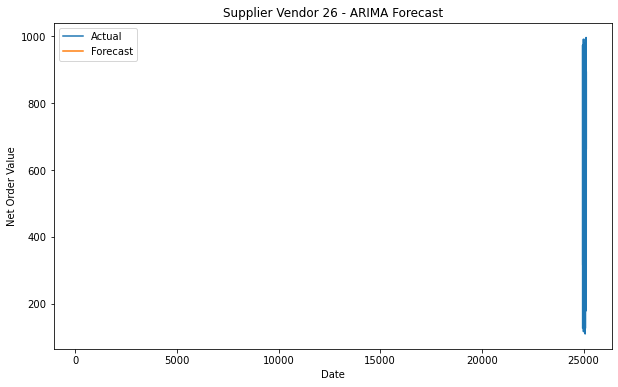

Supplier Vendor 242 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


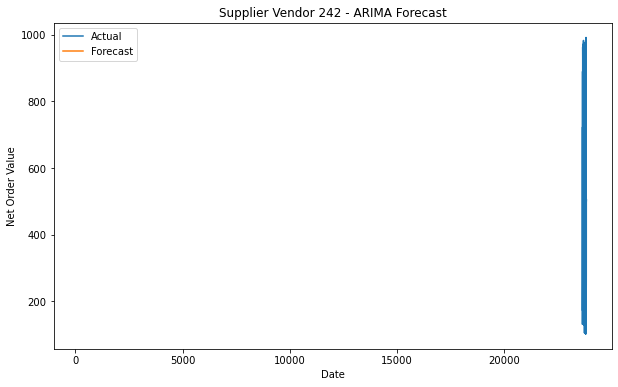

Supplier Vendor 70 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


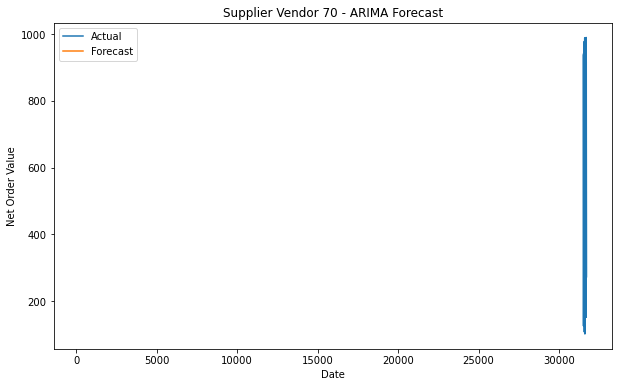

Supplier Vendor 116 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


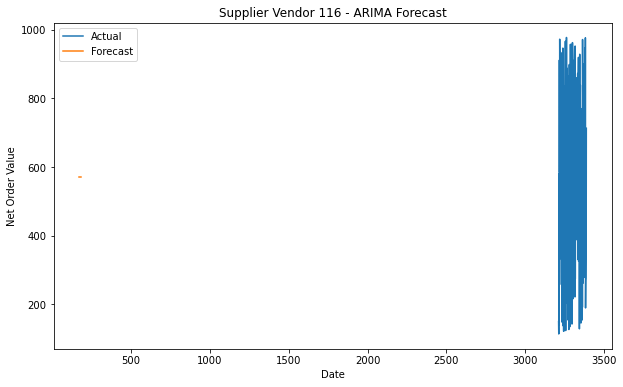

Supplier Vendor 24 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


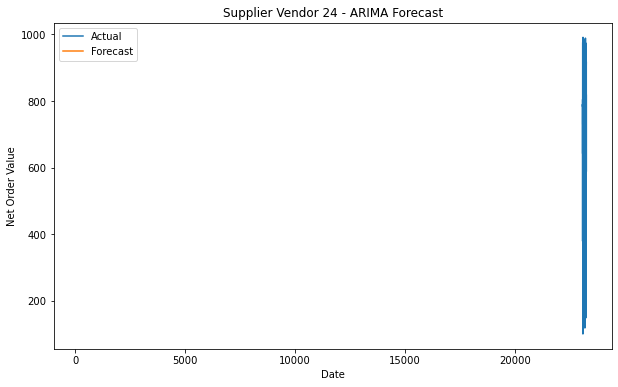

Supplier Vendor 125 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


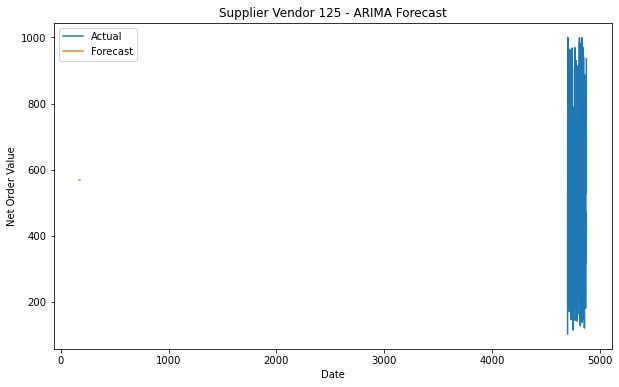

Supplier Vendor 99 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


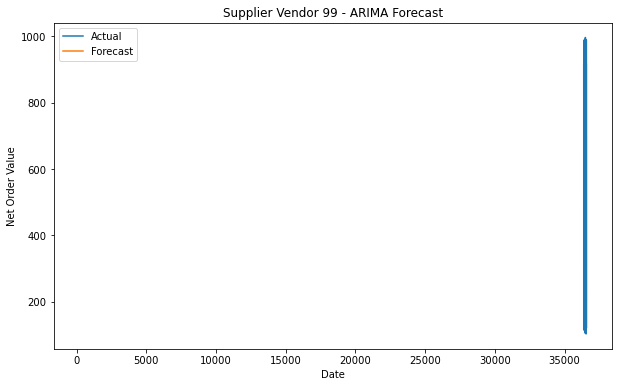

Supplier Vendor 182 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


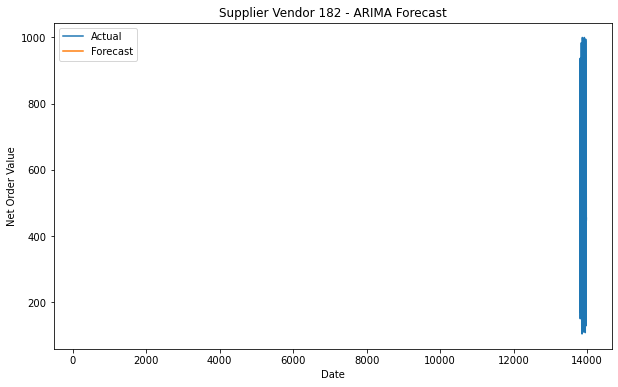

Supplier Vendor 76 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


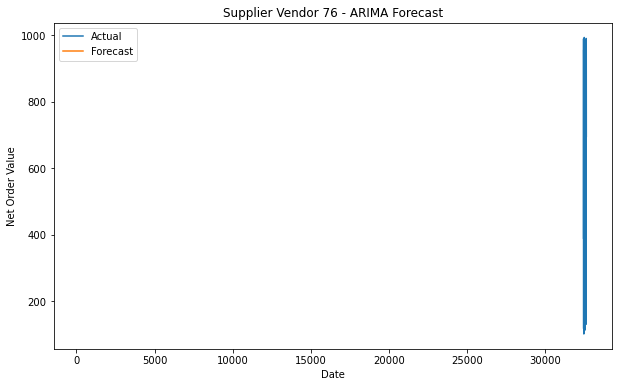

Supplier Vendor 79 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


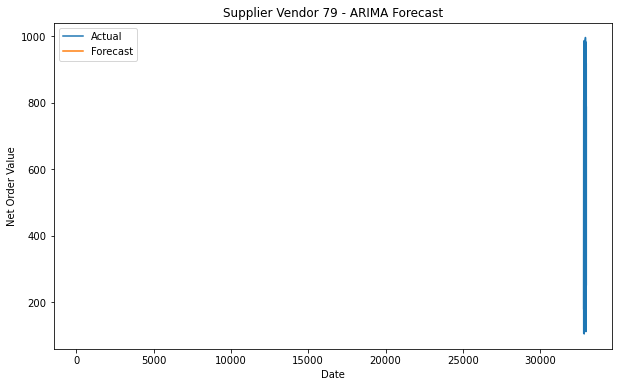

Supplier Vendor 97 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


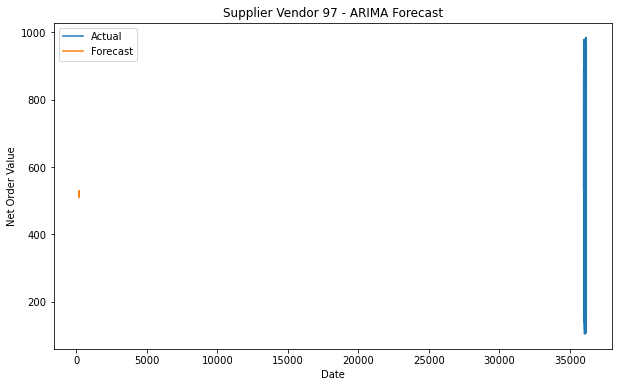

Supplier Vendor 156 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


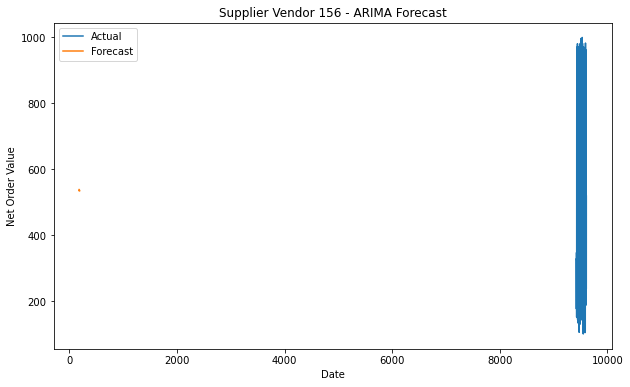

Supplier Vendor 86 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


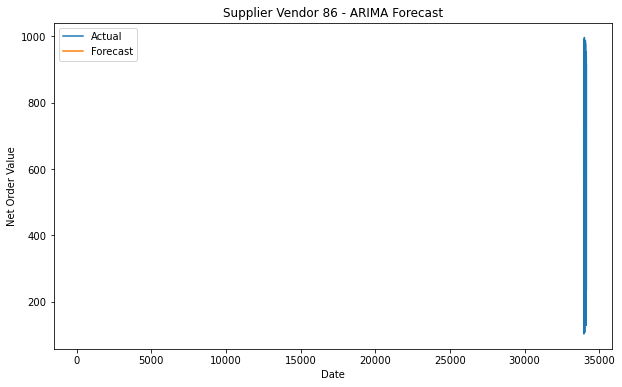

Supplier Vendor 87 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


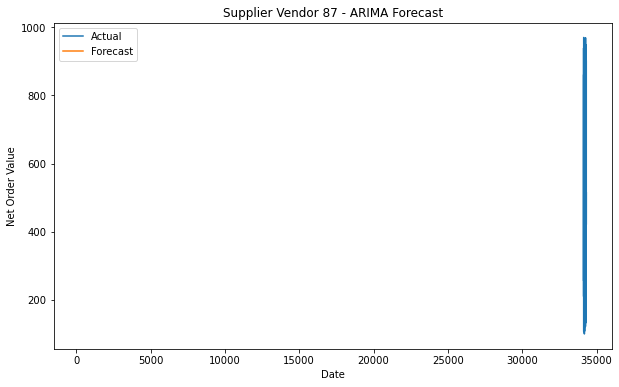

Supplier Vendor 237 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


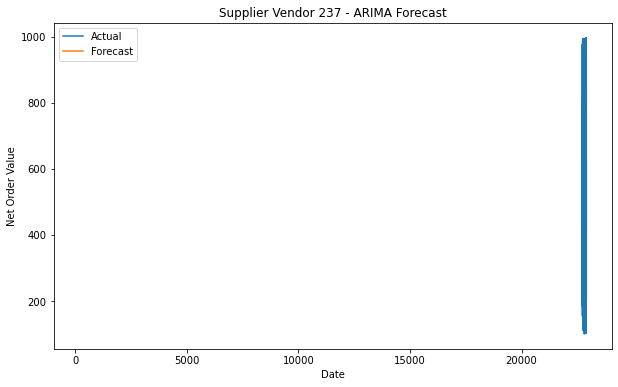

Supplier Vendor 32 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


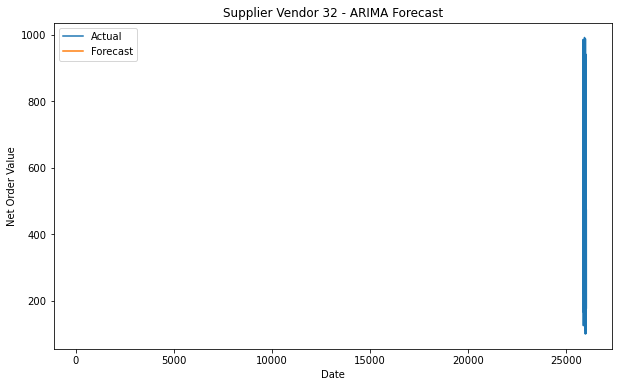

Supplier Vendor 244 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


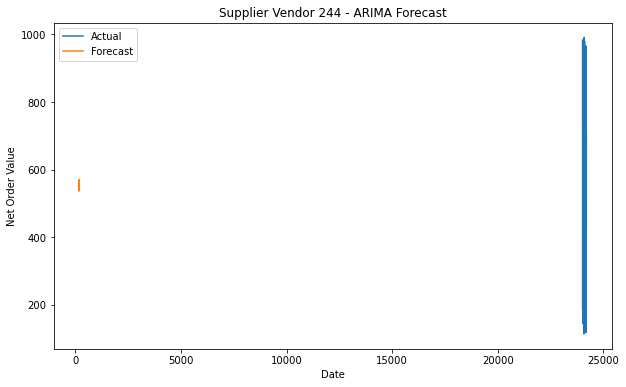

Supplier Vendor 100 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


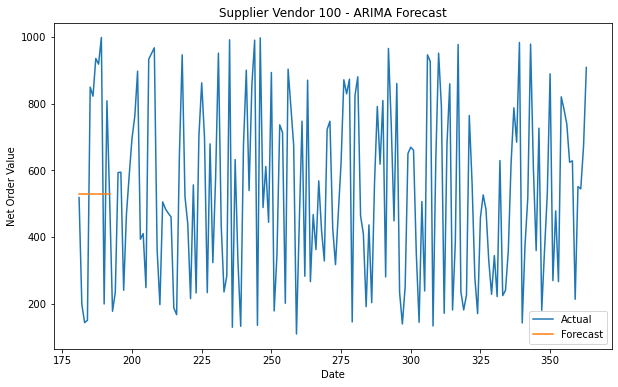

Supplier Vendor 128 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


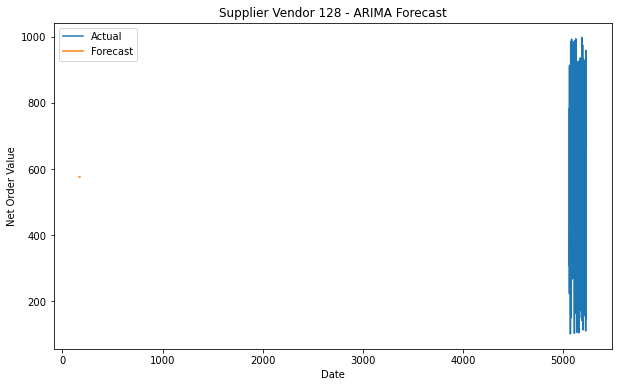

Supplier Vendor 167 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 1)


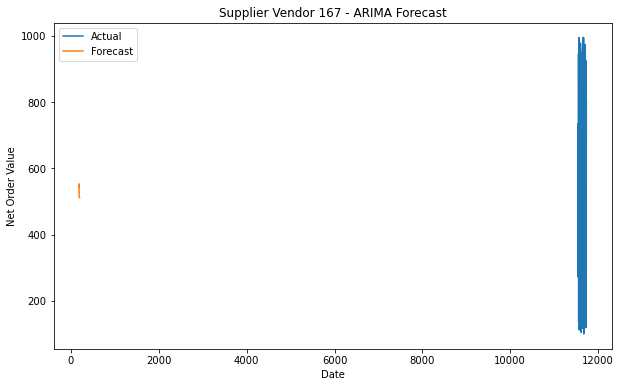

Supplier Vendor 223 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


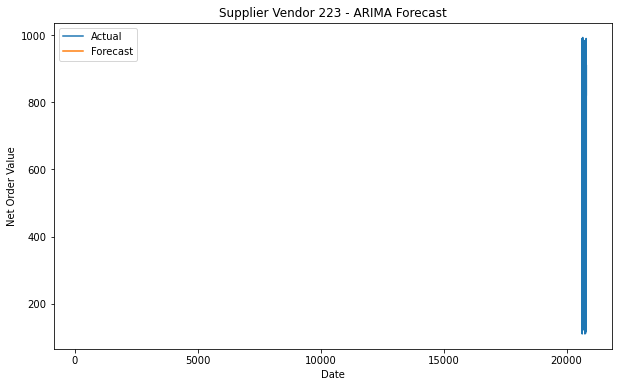

Supplier Vendor 38 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


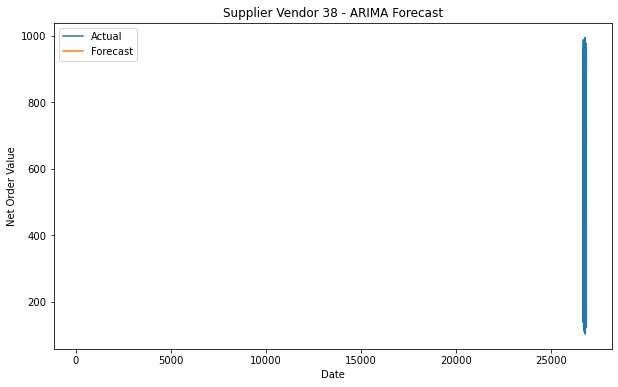

Supplier Vendor 203 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


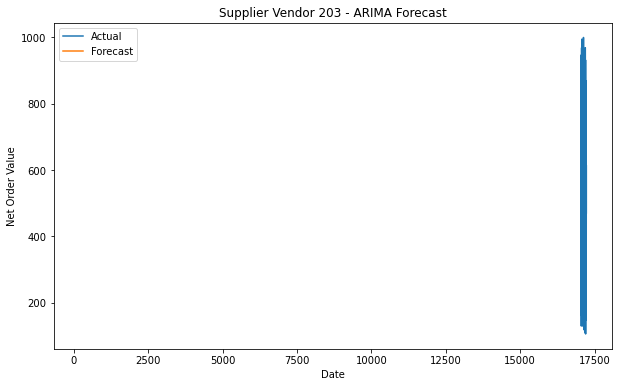

Supplier Vendor 144 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


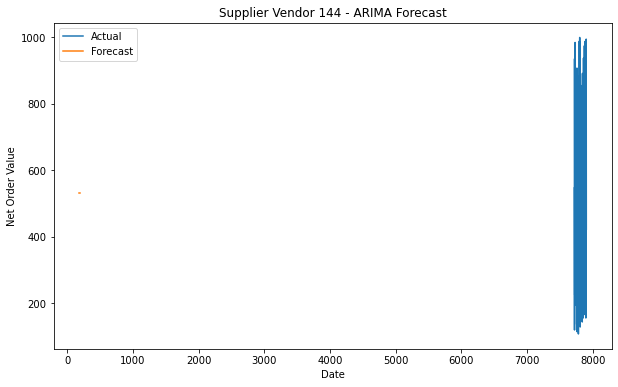

Supplier Vendor 10 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


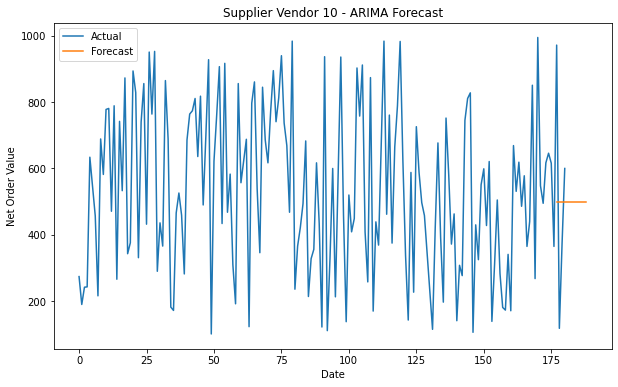

Supplier Vendor 187 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


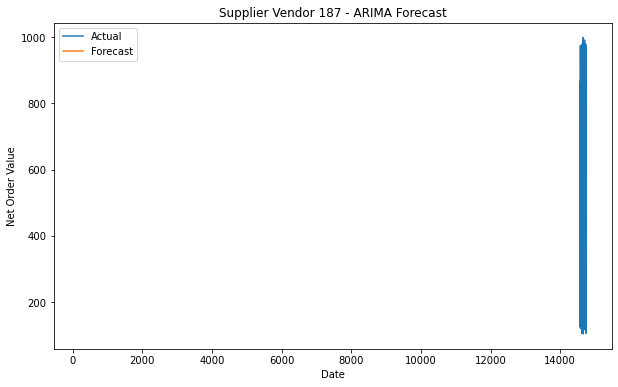

Supplier Vendor 222 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


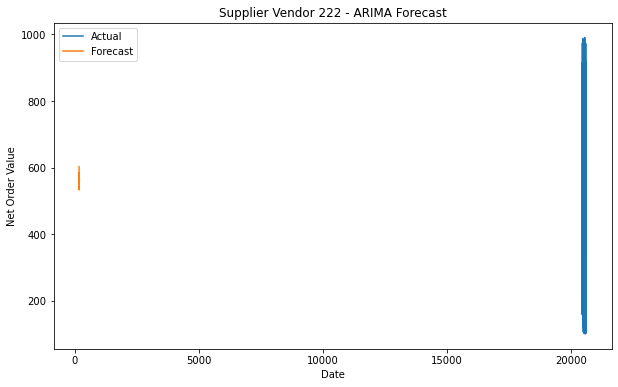

Supplier Vendor 102 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


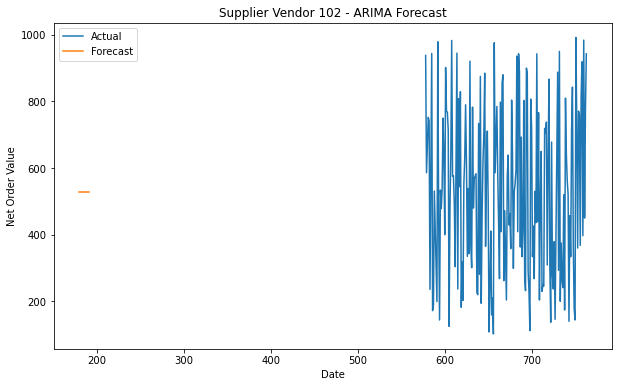

Supplier Vendor 176 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


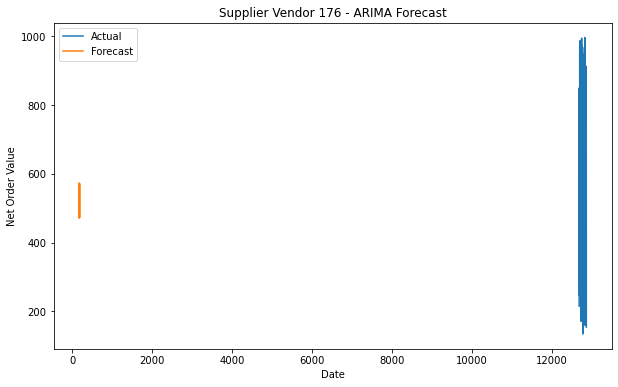

Supplier Vendor 28 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


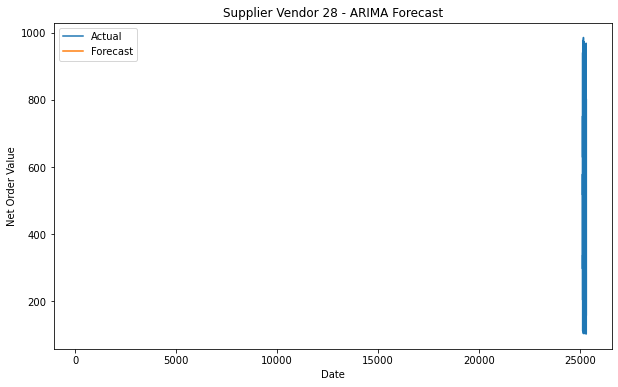

Supplier Vendor 135 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


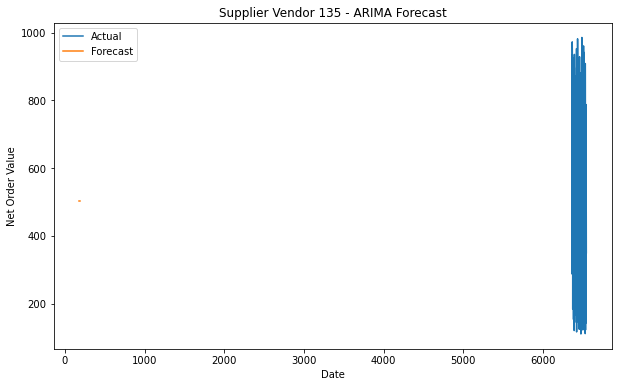

Supplier Vendor 114 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


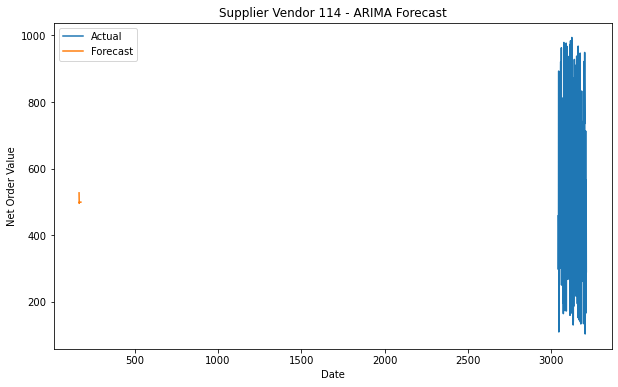

Supplier Vendor 161 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


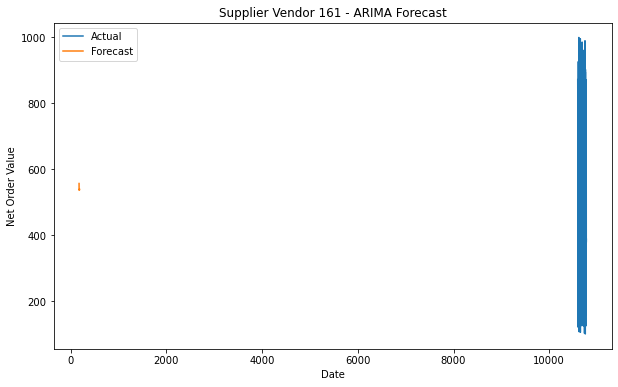

Supplier Vendor 43 data is not seasonal.
Best parameters for ARIMA model: Order (1, 0, 1)


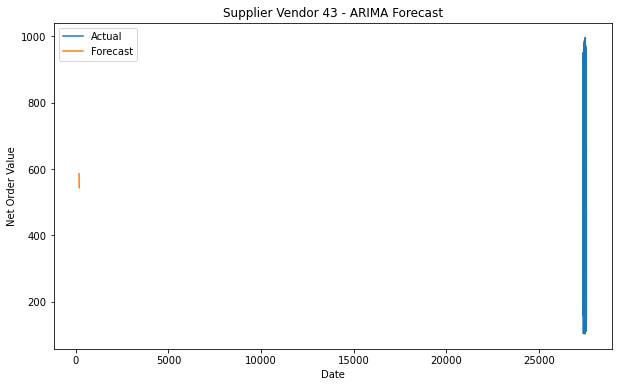

Supplier Vendor 232 data is not seasonal.
Best parameters for ARIMA model: Order (2, 1, 2)


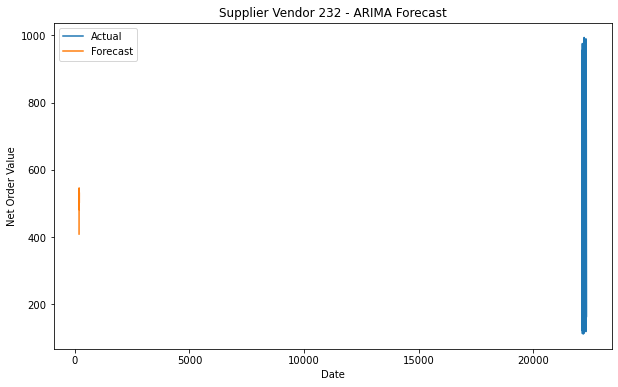

Supplier Vendor 192 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


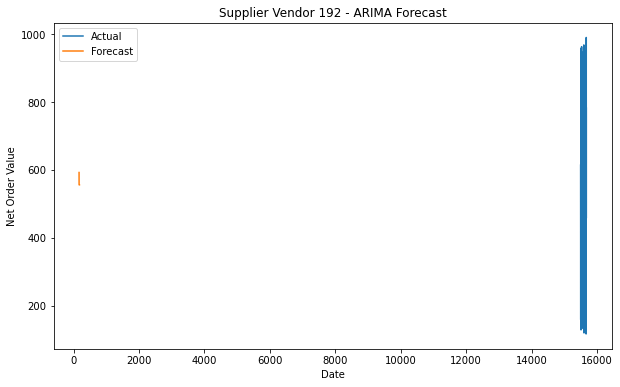

Supplier Vendor 103 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


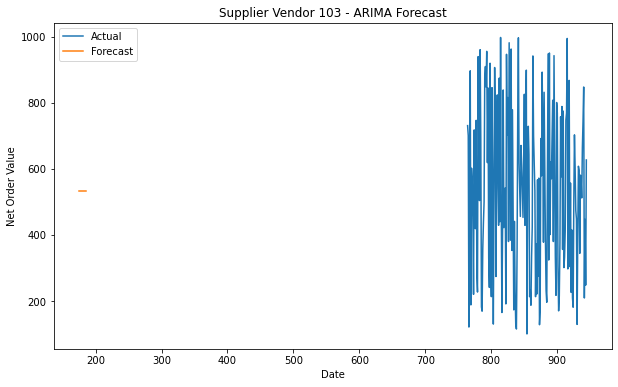

Supplier Vendor 107 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


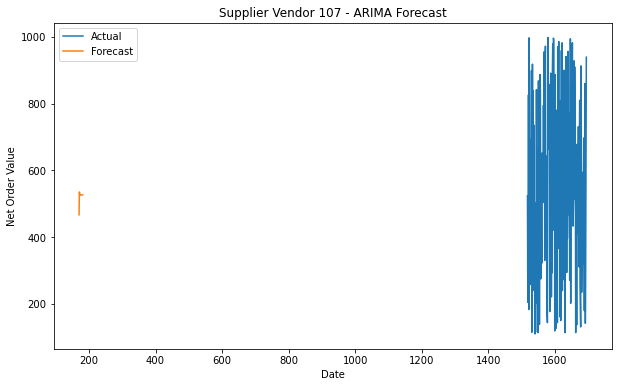

Supplier Vendor 61 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


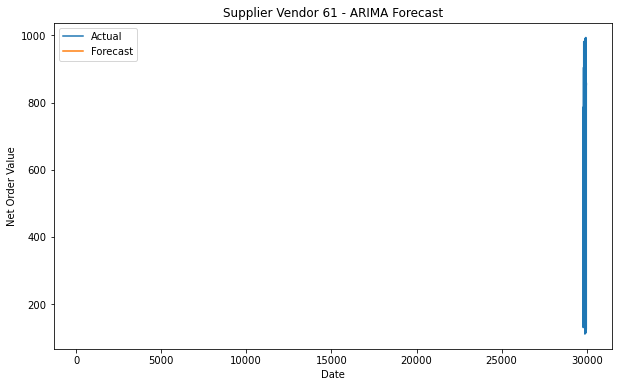

Supplier Vendor 64 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


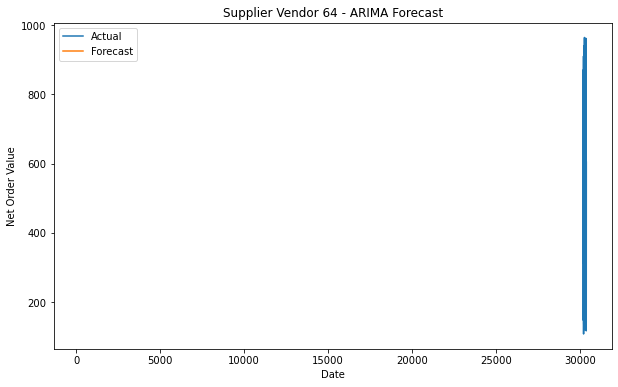

Supplier Vendor 241 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


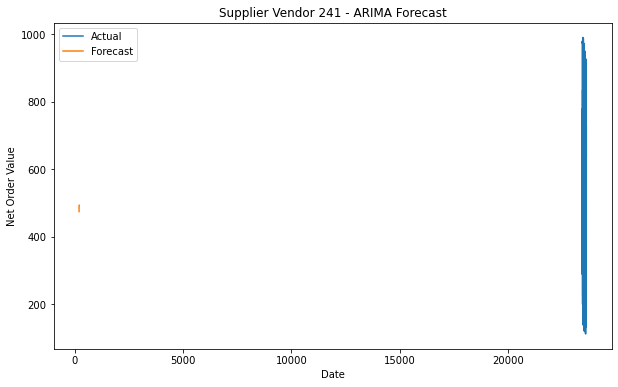

Supplier Vendor 183 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


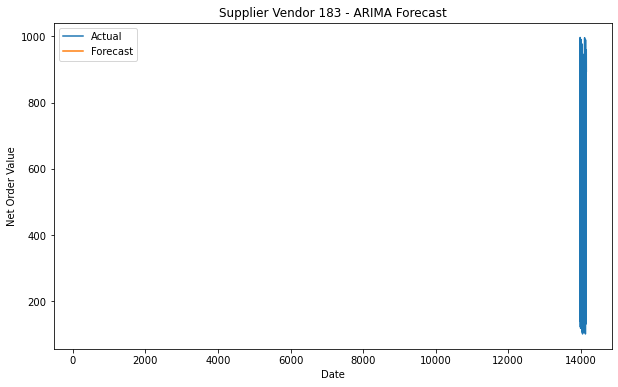

Supplier Vendor 130 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


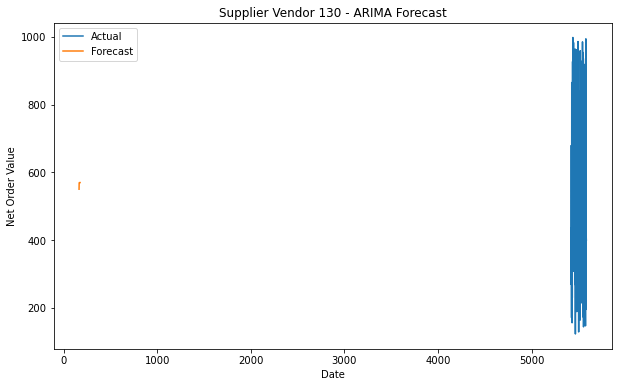

Supplier Vendor 53 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 1)


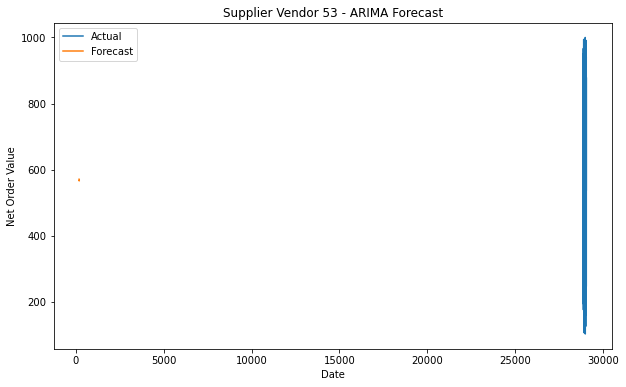

Supplier Vendor 126 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


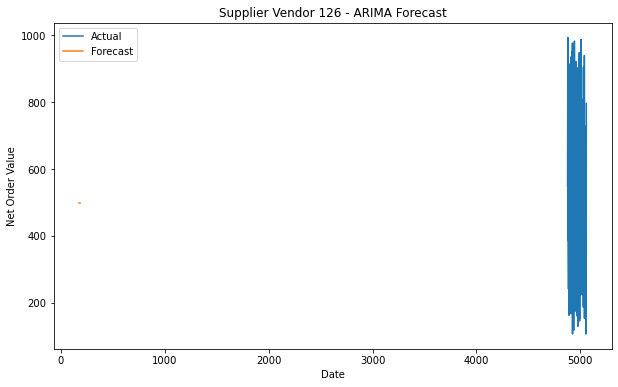

Supplier Vendor 120 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


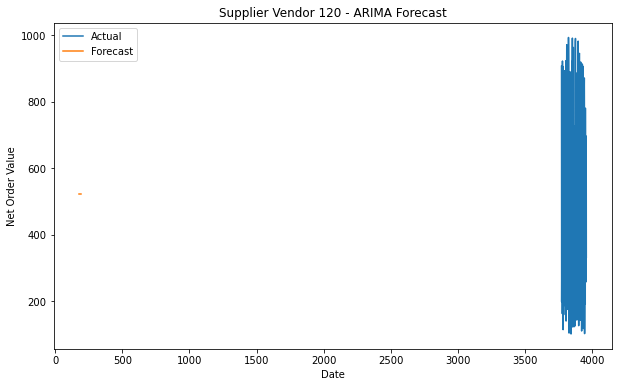

Supplier Vendor 190 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


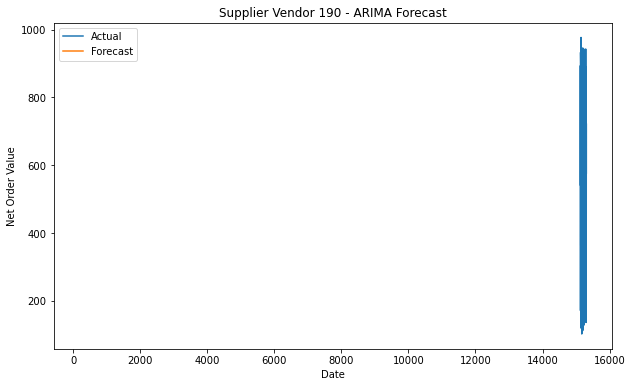

Supplier Vendor 134 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


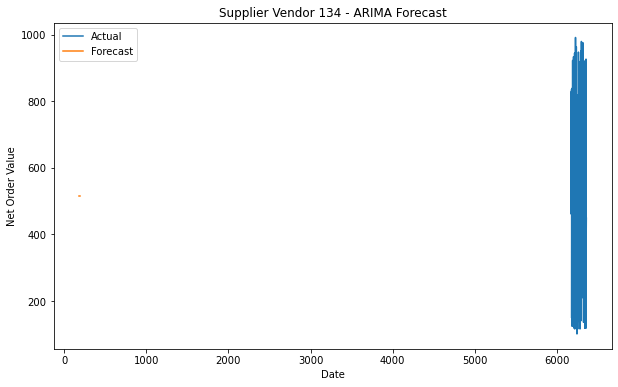

Supplier Vendor 82 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


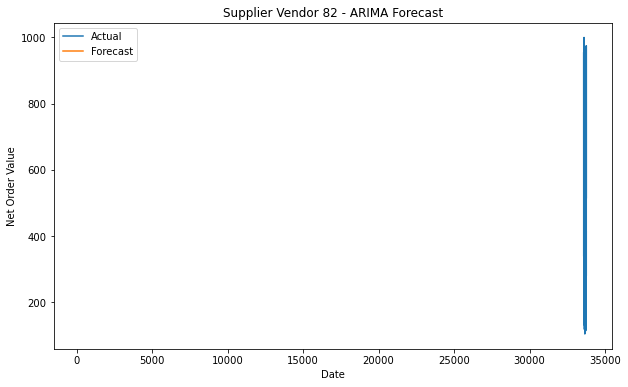

Supplier Vendor 177 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


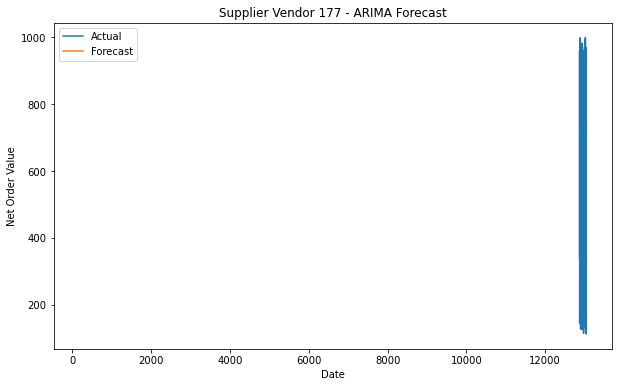

Supplier Vendor 50 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 2)


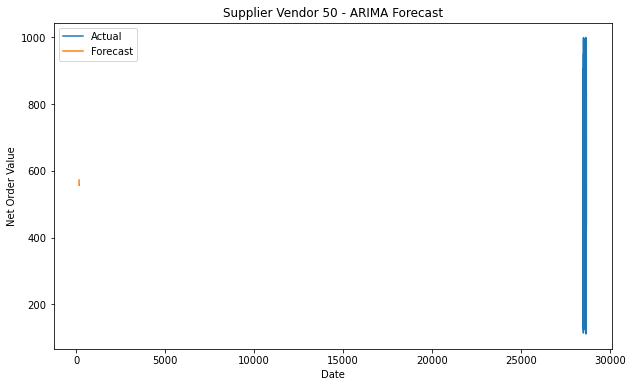

Supplier Vendor 166 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


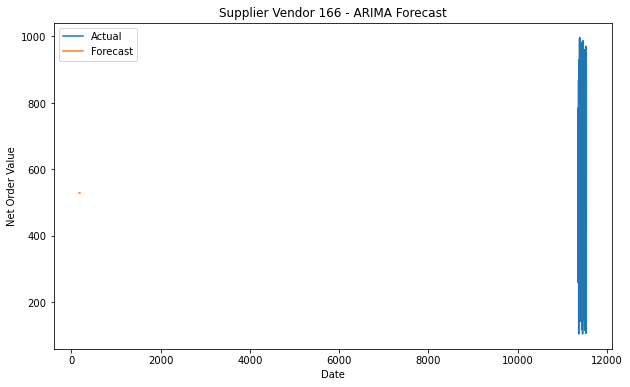

Supplier Vendor 45 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


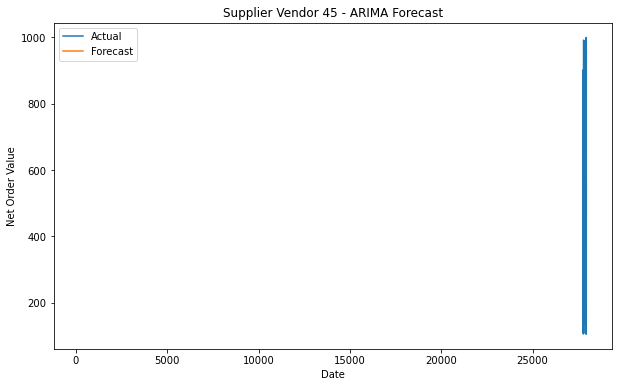

Supplier Vendor 4 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


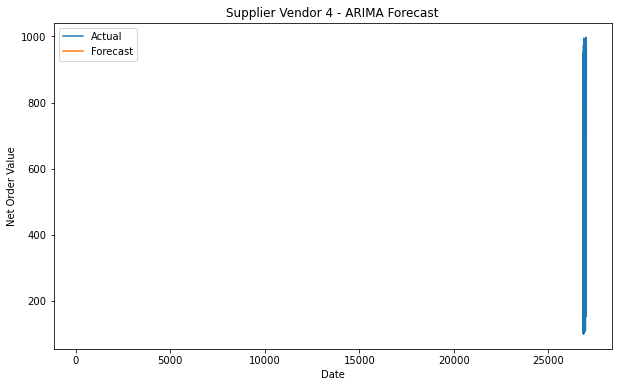

Supplier Vendor 46 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


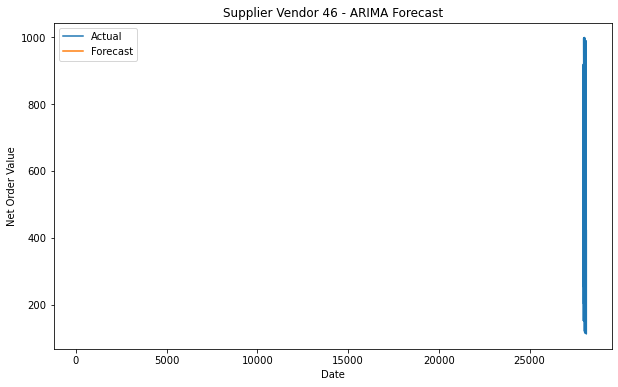

Supplier Vendor 150 data is not seasonal.
Best parameters for ARIMA model: Order (1, 1, 2)


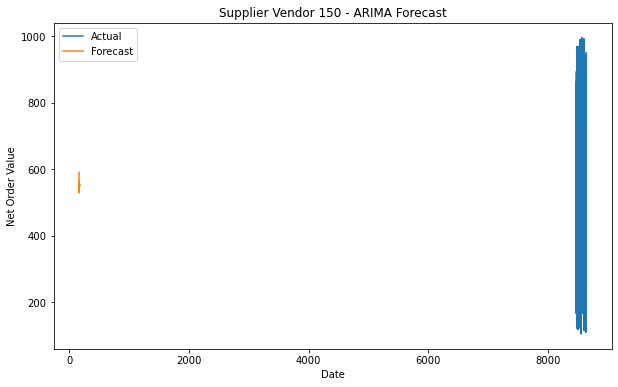

Supplier Vendor 89 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


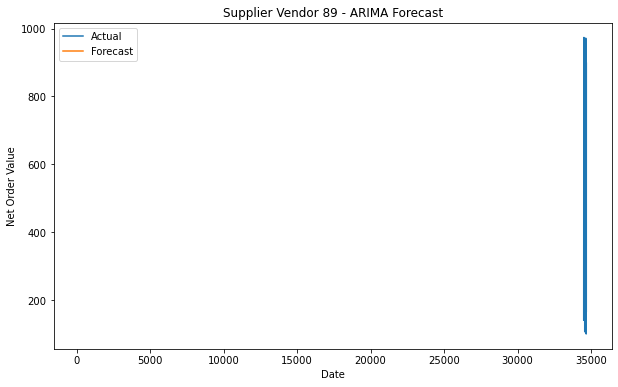

Supplier Vendor 88 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


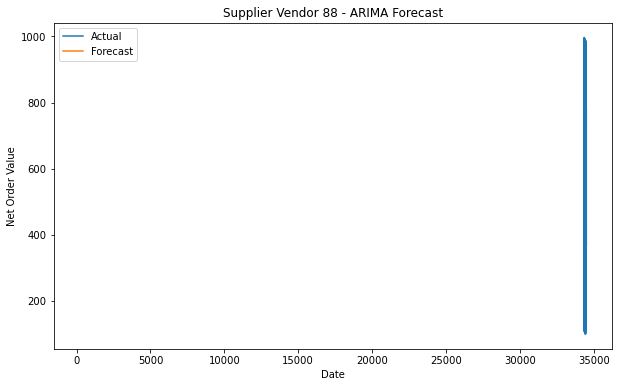

Supplier Vendor 148 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


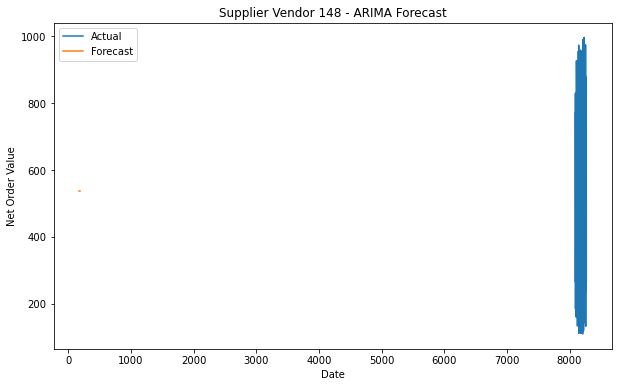

Supplier Vendor 238 data is not seasonal.
Best parameters for ARIMA model: Order (0, 1, 1)


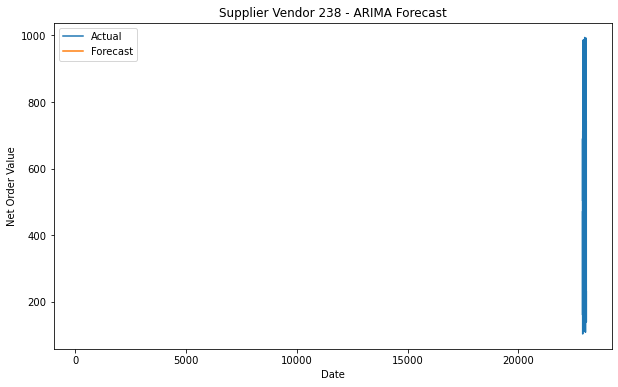

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Function to correct outliers in a series
def correct_outliers(series):
    mean = series.mean()
    std = series.std()
    threshold = 2 * std

    series_corrected = series.copy()
    series_corrected[(series > mean + threshold)] = mean
    series_corrected[(series < mean - threshold)] = mean

    return series_corrected

# Custom scoring function to compute AIC
def aic_score(order, series):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit.aic

# Identify suppliers with or without seasonality and perform modeling accordingly
for supplier in selected_suppliers:
    supplier_data = cleaned_df[cleaned_df['Vendor Name'] == supplier]['Net Order Value']

    # Outlier correction
    supplier_data_corrected = correct_outliers(supplier_data)

    # Dickey-Fuller test for seasonality
    adf_test = sm.tsa.stattools.adfuller(supplier_data_corrected)
    p_value = adf_test[1]

    if p_value >= 0.05:
        # Data is seasonal, perform SARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        best_seasonal_order = None
        param_grid = {
            'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)],
            'seasonal_order': [((p, d, q, s) if p+d+q+s > 0 else None)
                               for p in range(2) for d in range(2) for q in range(2) for s in [12]]
        }

        for order in param_grid['order']:
            for seasonal_order in param_grid['seasonal_order']:
                try:
                    aic = aic_score(order, supplier_data_corrected)
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                        best_seasonal_order = seasonal_order
                except:
                    continue

        print(f"Supplier {supplier} data is seasonal.")
        print(f"Best parameters for SARIMA model: Order {best_order}, Seasonal Order {best_seasonal_order}")

        # Fit SARIMA model with best parameters
        sarima_model = SARIMAX(supplier_data_corrected, order=best_order, seasonal_order=best_seasonal_order)
        sarima_model_fit = sarima_model.fit()

        # Forecast for the next 1 year
        forecast = sarima_model_fit.forecast(steps=12)

        # Plot the forecasted values
        plt.figure(figsize=(10, 6))
        plt.plot(supplier_data_corrected.index, supplier_data_corrected, label='Actual')
        plt.plot(forecast.index, forecast, label='Forecast')
        plt.title(f"Supplier {supplier} - SARIMA Forecast")
        plt.xlabel("Date")
        plt.ylabel("Net Order Value")
        plt.legend()
        plt.show()

    else:
        # Data is not seasonal, perform ARIMA modeling

        # Hyperparameter tuning
        best_aic = np.inf
        best_order = None
        param_grid = {'order': [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]}

        for order in param_grid['order']:
            try:
                aic = aic_score(order, supplier_data_corrected)
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

        print(f"Supplier {supplier} data is not seasonal.")
        print(f"Best parameters for ARIMA model: Order {best_order}")

        # Fit ARIMA model with best parameters
        arima_model = ARIMA(supplier_data_corrected, order=best_order)
        arima_model_fit = arima_model.fit()

        # Forecast for the next 1 year
        forecast = arima_model_fit.forecast(steps=12)

        # Plot the forecasted values
        plt.figure(figsize=(10, 6))
        plt.plot(supplier_data_corrected.index, supplier_data_corrected, label='Actual')
        plt.plot(forecast.index, forecast, label='Forecast')
        plt.title(f"Supplier {supplier} - ARIMA Forecast")
        plt.xlabel("Date")
        plt.ylabel("Net Order Value")
        plt.legend()
        plt.show()
